In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [16]:
%matplotlib inline


In [5]:
file_path = 'pandas_dataframes'

markers = ['o','s','^','d','*']
filepath = 'figures_paper/'

In [6]:
def load_pandas_df(file_path, file_name):
    file = file_path + '/' + file_name
    df = pd.read_pickle(file)
    
    return df
    
def filter_bound_2_3_out(df):
    
    df = df.astype({'depth': int, 'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

    df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_3_out(df):
    
    df = df.astype({'width': int, 'input_dim':int, 'output_dim':int})
    df.replace({'H_o_cond_bound2': 'loose upper bound', 'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)
    df.replace({'sequential': 'FCNN', 'lin_residual_network': 'ResNet'}, inplace=True)

#     df = df[df['type'] != 'H_o_cond_bound2']
    df = df[df['type'] != 'H_o_cond_bound3']
    return df

def filter_bound_1_out(df):
    
    df = df[df['type'] != 'upper bound']
    return df
        
def make_lineplot_BN_comparison(df, title, log_scale=False, filename=None, save=False):
    
    f = plt.figure(figsize=(8,5))
    
    g = sns.lineplot(df, x='width',y='H_o_cond', alpha=0.7, hue='batchnorm', style='batchnorm', markers=markers)
    g.set_xlabel('Width $m$')
    g.set_ylabel('$\kappa(\widehat{H}_O)$')
#     g.add_legend(title='') 

    g.set_title(title)
#     g.fig.subplots_adjust(top=0.90)

#     if log_scale:
#         g.set(yscale='log')
        
    if save==True:
        f.savefig(filepath+ filename + '.pdf', bbox_inches='tight')
    

In [6]:
file_name = 'outer_prod_hessian_information_initialization_experiments_leaky_ReLU_Cifar_alpha=0.pkl'
df_leakyrelu_alpha0 = load_pandas_df(file_path, file_name)

df_leakyrelu_alpha0.insert(0,'alpha',0)

file_name = 'outer_prod_hessian_information_initialization_experiments_leaky_ReLU_Cifar_alpha=0.1.pkl'
df_leakyrelu_alpha01 = load_pandas_df(file_path, file_name)

df_leakyrelu_alpha01.insert(0,'alpha',0.1)

file_name = 'outer_prod_hessian_information_initialization_experiments_leaky_ReLU_Cifar_alpha=0.3.pkl'
df_leakyrelu_alpha03 = load_pandas_df(file_path, file_name)

df_leakyrelu_alpha03.insert(0,'alpha',0.3)

file_name = 'outer_prod_hessian_information_initialization_experiments_leaky_ReLU_Cifar_alpha=0.5.pkl'
df_leakyrelu_alpha05 = load_pandas_df(file_path, file_name)

df_leakyrelu_alpha05.insert(0,'alpha',0.5)

file_name = 'outer_prod_hessian_information_initialization_experiments_leaky_ReLU_Cifar_alpha=1.pkl'
df_leakyrelu_alpha1 = load_pandas_df(file_path, file_name)

df_leakyrelu_alpha1.insert(0,'alpha',1)


In [7]:
df_cat = pd.concat([df_leakyrelu_alpha0,df_leakyrelu_alpha01,df_leakyrelu_alpha03,df_leakyrelu_alpha05,df_leakyrelu_alpha1])

In [8]:
df_cat = df_cat[df_cat['type'] != 'H_o_cond_bound2']

In [9]:
df_cat.head()

,alpha,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,0.0,cifar-10,sequential,1.0,3072.0,10.0,1000.0,1.0,leaky_relu,0.0,H_o_cond,66.445780
1,0.0,cifar-10,sequential,1.0,3072.0,10.0,1000.0,1.0,leaky_relu,0.0,H_o_cond_bound1,2771.463418
3,0.0,cifar-10,sequential,1.0,3072.0,10.0,1000.0,1.0,leaky_relu,0.0,H_o_cond_bound1.5,8439.318227
4,0.0,cifar-10,sequential,1.0,3072.0,10.0,1000.0,1.0,leaky_relu,0.0,H_o_cond,67.553661
5,0.0,cifar-10,sequential,1.0,3072.0,10.0,1000.0,1.0,leaky_relu,0.0,H_o_cond_bound1,2845.837512


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


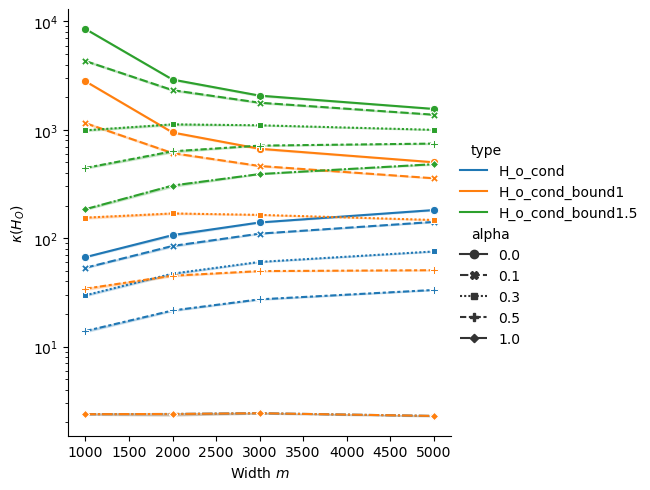

In [10]:
g = sns.relplot(df_cat, x='width', y='value', hue='type', style='alpha', markers=True, kind='line')

g.set(yscale='log')

g.set_axis_labels(r'Width $m$', r'$\kappa(H_O)$')
g.set_titles('Cifar-10, n=500. d=3072, k=10, Leaky_ReLU')

In [11]:
df_cat_fil = df_cat[df_cat['type'] != 'H_o_cond_bound1.5']

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


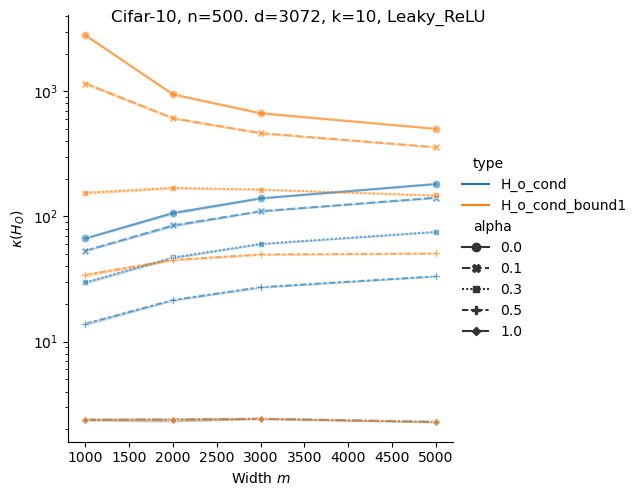

In [12]:
g = sns.relplot(df_cat_fil, x='width', y='value', alpha=0.6, hue='type', style='alpha', markers=True, kind='line')

g.set(yscale='log')

g.set_axis_labels(r'Width $m$', r'$\kappa(H_O)$')
g.fig.suptitle('Cifar-10, n=500. d=3072, k=10, Leaky_ReLU')
plt.show()

g.savefig('Leaky_ReLU_Cifar10_alphas_bound1.jpg')

In [13]:
df_cat_fil = df_cat[df_cat['type'] != 'H_o_cond_bound1']

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


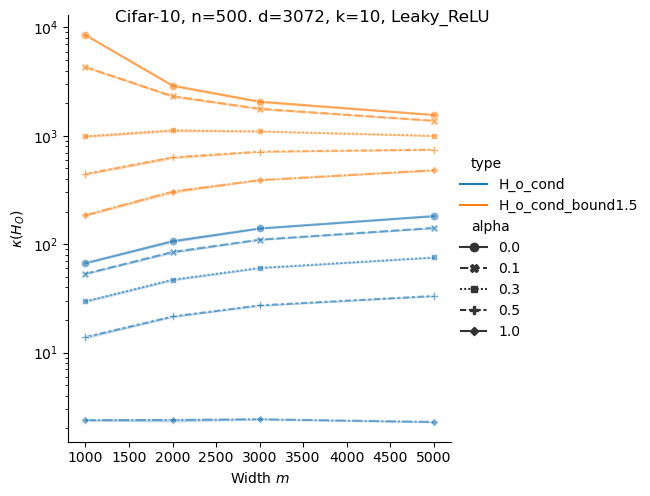

In [14]:
g = sns.relplot(df_cat_fil, x='width', y='value', alpha=0.6, hue='type', style='alpha', markers=True, kind='line')

g.set(yscale='log')

g.set_axis_labels(r'Width $m$', r'$\kappa(H_O)$')
g.fig.suptitle('Cifar-10, n=500. d=3072, k=10, Leaky_ReLU')
plt.show()

g.savefig('Leaky_ReLU_Cifar10_alphas_bound1.5.jpg')

## Training Linear network with Adam

In [15]:
def plot_cond_num(df, title, filename=None):
    g = sns.relplot(df, x='epoch', y='value', hue='type',kind='line', style='type', markers=True)
        
    g.set_axis_labels('Epochs', r'$\kappa(\widehat{H}_O)$')
    
    g.fig.suptitle(title)
    
    g.fig.subplots_adjust(top=0.9)
    
    if filename:
        g.savefig(filename)
        

In [16]:
def plot_loss(df,df2, title, filename=None):
    
    plt.semilogy(df.loss, label='whitened')
    plt.semilogy(df2.loss, label='not whitened')
    
    plt.xlabel('Iterations k')
    plt.ylabel('$f(x_k)$')
    
    plt.title(title)
    
    plt.legend()
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')

In [17]:
file_name1 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_NOTwhitened_Adam_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_NOTwhitened.pkl'
file_name2 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_NOTwhitened_Adam_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_whitened.pkl'
file_name3 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_Adam_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_NOTwhitened.pkl'
file_name4 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_Adam_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_whitened.pkl'

df_trained_NOTwhitened_calc_NOTwhitened = load_pandas_df(file_path, file_name1)
df_trained_NOTwhitened_calc_whitened = load_pandas_df(file_path, file_name2)
df_trained_whitened_calc_NOTwhitened = load_pandas_df(file_path, file_name3)
df_trained_whitened_calc_whitened = load_pandas_df(file_path, file_name4)



df_trained_NOTwhitened_calc_NOTwhitened_Adam1 = filter_bound_2_3_out(df_trained_NOTwhitened_calc_NOTwhitened)
df_trained_NOTwhitened_calc_whitened_Adam1 = filter_bound_2_3_out(df_trained_NOTwhitened_calc_whitened)
df_trained_whitened_calc_NOTwhitened_Adam1 = filter_bound_2_3_out(df_trained_whitened_calc_NOTwhitened)
df_trained_whitened_calc_whitened_Adam1 = filter_bound_2_3_out(df_trained_whitened_calc_whitened)


In [18]:
df_trained_whitened_calc_whitened_Adam1.insert(0,'optimizer','Adam')
df_trained_NOTwhitened_calc_NOTwhitened_Adam1.insert(0,'optimizer','Adam')

In [19]:
df_trained_whitened_calc_whitened.head()

,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,gaussian,sequential,1.000003,50.0,1.0,100.0,3.0,linear,0.0,H_o_cond,13.108476
1,gaussian,sequential,1.000003,50.0,1.0,100.0,3.0,linear,0.0,H_o_cond_bound1,15.809663
2,gaussian,sequential,1.000003,50.0,1.0,100.0,3.0,linear,0.0,H_o_cond_bound2,348.365468
3,gaussian,sequential,1.000003,50.0,1.0,100.0,3.0,linear,0.0,H_o_cond_bound3,940.694702
4,gaussian,sequential,1.000003,50.0,1.0,100.0,3.0,linear,2.0,H_o_cond,17.158079


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


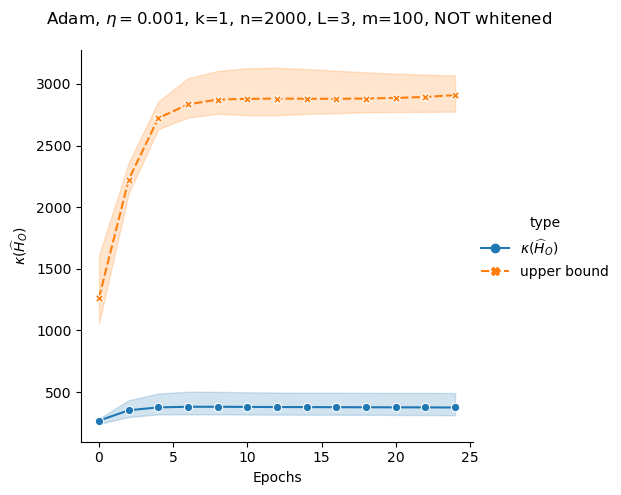

In [20]:
plot_cond_num(df_trained_NOTwhitened_calc_NOTwhitened_Adam1, r'Adam, $\eta=0.001$, k=1, n=2000, L=3, m=100, NOT whitened',
             'adam_eta=0.001_k=1_n=2000_L=3_m=100_NOTwhitened_train_NOTwhitened_calc.pdf')

# sns.relplot(df_trained_NOTwhitened_calc_NOTwhitened, x='epoch', y='value', hue='type',kind='line',markers=True)

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


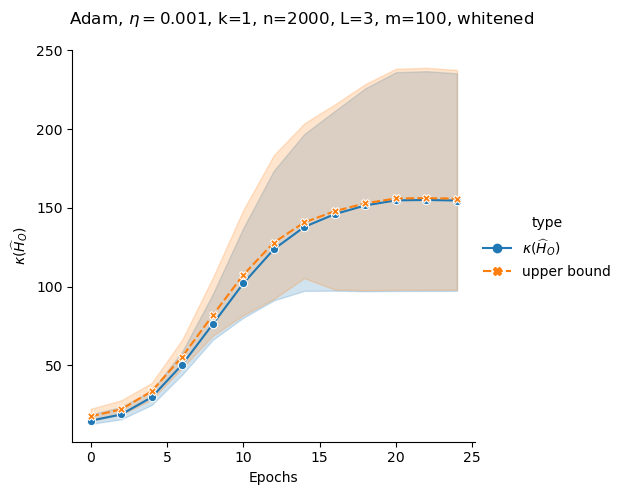

In [21]:
plot_cond_num(df_trained_whitened_calc_whitened_Adam1, r'Adam, $\eta=0.001$, k=1, n=2000, L=3, m=100, whitened',
             'adam_eta=0.001_k=1_n=2000_L=3_m=100_whitened_train_whitened_calc.pdf')

# df_trained_whitened_calc_whitened


In [22]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_adam_lr=0.001_whitened.pkl'
fn2 = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_adam_lr=0.001_NOTwhitened.pkl'


df_training_info_whitened = load_pandas_df(file_path, fn)
df_training_info_NOTwhitened = load_pandas_df(file_path, fn2)

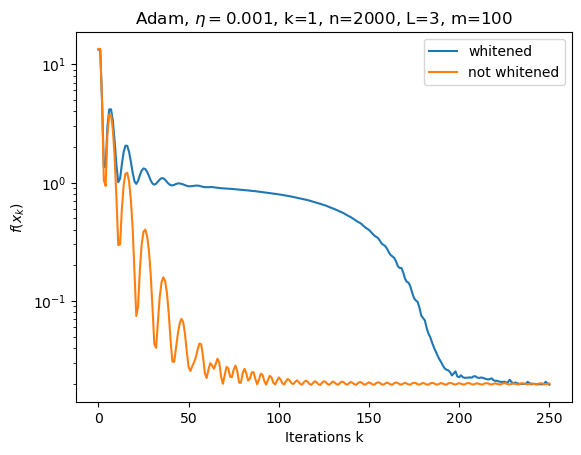

In [23]:
plot_loss(df_training_info_whitened,df_training_info_NOTwhitened, r'Adam, $\eta=0.001$, k=1, n=2000, L=3, m=100',
         'adam_eta=0.001_k=1_n=2000_L=3_m=100.pdf')

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_adam_whitened.pkl'
# fn2 = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_adam_NOTwhitened.pkl'


# df_training_info_whitened = load_pandas_df(file_path, fn)
# df_training_info_NOTwhitened = load_pandas_df(file_path, fn2)
# plot_loss(df_training_info_whitened,df_training_info_NOTwhitened, r'Adam, $\eta=0.001,0.002$, k=1, n=2000, L=3, m=100',
#          'adam_eta=0.001_')


## Training with SGD

In [24]:
file_name1 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_NOTwhitened_SGD_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_NOTwhitened.pkl'
file_name2 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_NOTwhitened_SGD_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_whitened.pkl'
file_name3 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_SGD_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_NOTwhitened.pkl'
file_name4 = 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_SGD_eta=0.001_d=50_k=1_n=2000_L=3_m=100_calc_on_whitened.pkl'

df_trained_NOTwhitened_calc_NOTwhitened = load_pandas_df(file_path, file_name1)
df_trained_NOTwhitened_calc_whitened = load_pandas_df(file_path, file_name2)
df_trained_whitened_calc_NOTwhitened = load_pandas_df(file_path, file_name3)
df_trained_whitened_calc_whitened = load_pandas_df(file_path, file_name4)



df_trained_NOTwhitened_calc_NOTwhitened_SGD1 = filter_bound_2_3_out(df_trained_NOTwhitened_calc_NOTwhitened)
df_trained_NOTwhitened_calc_whitened_SGD1 = filter_bound_2_3_out(df_trained_NOTwhitened_calc_whitened)
df_trained_whitened_calc_NOTwhitened_SGD1 = filter_bound_2_3_out(df_trained_whitened_calc_NOTwhitened)
df_trained_whitened_calc_whitened_SGD1 = filter_bound_2_3_out(df_trained_whitened_calc_whitened)


In [25]:
df_trained_NOTwhitened_calc_NOTwhitened_SGD1.insert(0,'optimizer','SGD')
df_trained_whitened_calc_whitened_SGD1.insert(0,'optimizer','SGD')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


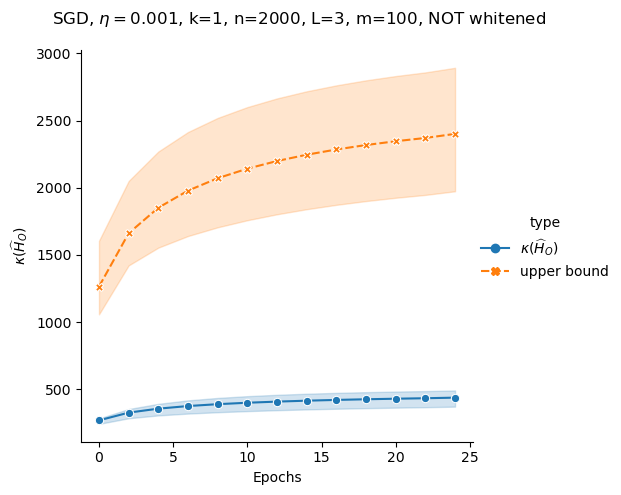

In [26]:
plot_cond_num(df_trained_NOTwhitened_calc_NOTwhitened_SGD1, r'SGD, $\eta=0.001$, k=1, n=2000, L=3, m=100, NOT whitened',
             'sgd_eta=0.001_k=1_n=2000_L=3_m=100_NOTwhitened_train_NOTwhitened_calc.pdf')

# sns.relplot(df_trained_NOTwhitened_calc_NOTwhitened, x='epoch', y='value', hue='type',kind='line',markers=True)

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


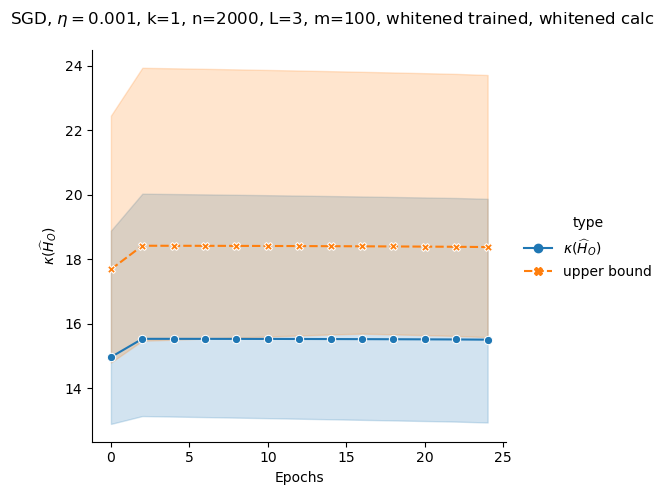

In [27]:
plot_cond_num(df_trained_whitened_calc_whitened_SGD1, r'SGD, $\eta=0.001$, k=1, n=2000, L=3, m=100, whitened trained, whitened calc',
             'sgd_eta=0.001_k=1_n=2000_L=3_m=100_whitened_train_whitened_calc.pdf')

In [28]:
df_con1 = pd.concat([df_trained_NOTwhitened_calc_NOTwhitened_SGD1, df_trained_NOTwhitened_calc_NOTwhitened_Adam1])

df_con2 = pd.concat([df_trained_whitened_calc_whitened_SGD1, df_trained_whitened_calc_whitened_Adam1])

In [29]:
df_con2

,optimizer,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,SGD,gaussian,FCNN,1.000003,50,1,100,3,linear,0.0,$\kappa(\widehat{H}_O)$,13.108476
1,SGD,gaussian,FCNN,1.000003,50,1,100,3,linear,0.0,upper bound,15.809663
4,SGD,gaussian,FCNN,1.000003,50,1,100,3,linear,2.0,$\kappa(\widehat{H}_O)$,13.131985
5,SGD,gaussian,FCNN,1.000003,50,1,100,3,linear,2.0,upper bound,15.844964
8,SGD,gaussian,FCNN,1.000003,50,1,100,3,linear,4.0,$\kappa(\widehat{H}_O)$,13.116029
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Adam,gaussian,FCNN,1.000003,50,1,100,3,linear,20.0,upper bound,238.373187
148,Adam,gaussian,FCNN,1.000003,50,1,100,3,linear,22.0,$\kappa(\widehat{H}_O)$,236.855657
149,Adam,gaussian,FCNN,1.000003,50,1,100,3,linear,22.0,upper bound,238.985343
152,Adam,gaussian,FCNN,1.000003,50,1,100,3,linear,24.0,$\kappa(\widehat{H}_O)$,235.493756


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


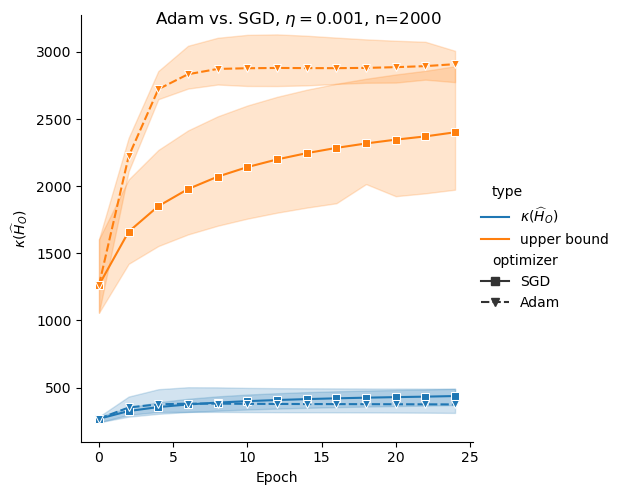

In [30]:
g = sns.relplot(df_con1, x='epoch',y='value', hue='type', style='optimizer', markers=['s','v'], kind='line')

g.set_axis_labels('Epoch',r'$\kappa(\widehat{H}_O)$')

g.fig.suptitle('Adam vs. SGD, $\eta=0.001$, n=2000')

g.savefig('adam_vs_sgd_eta=0.001_NOTwhitened.pdf')

In [31]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_NOTwhitened.pkl'
df_lr001 = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.001_NOTwhitened.pkl'
df_lr001a = load_pandas_df(file_path, fn)



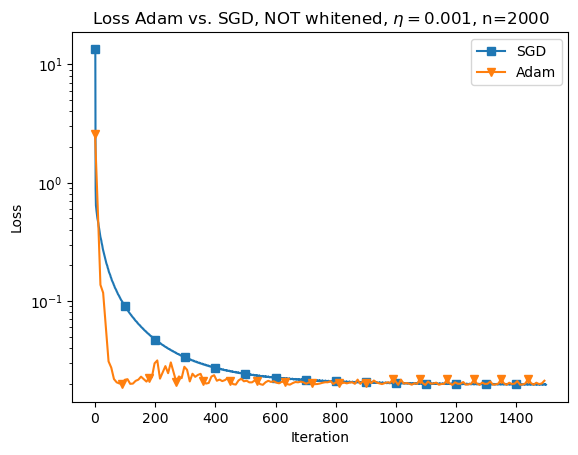

In [32]:
# plt.semilogy(df_lr001.loss[:500], label='SGD, eta=0.001', marker='s', markevery=100)
# plt.semilogy(df_lr0015.loss[:500], label='SGD, eta=0.0015', marker='s', markevery=100)
plt.semilogy(df_lr001.loss[:1500], label='SGD', marker='s', markevery=100)
# plt.semilogy(df_lr003.loss[:500], label='SGD, eta=0.003', marker='s', markevery=100)

# plt.semilogy(df_lr001a.loss[:500], label='Adam, eta=0.001', marker='v', markevery=100)
# plt.semilogy(df_lr0015a.loss[:500], label='Adam, eta=0.0015', marker='v', markevery=100)
plt.semilogy(df_lr001a.loss[:1500:9], label='Adam', marker='v', markevery=10)
# plt.semilogy(df_lr003a.loss[:500], label='Adam, eta=0.003', marker='v', markevery=100)

plt.legend()

plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.title('Loss Adam vs. SGD, NOT whitened, $\eta=0.001$, n=2000')

plt.savefig('loss_adam_vs_sgd_eta=0.001_NOTwhitened.pdf', bbox_inches='tight')

In [33]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.001_whitened.pkl'
df_lr001aw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.0015_whitened.pkl'
df_lr0015aw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.002_whitened.pkl'
df_lr002aw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.003_whitened.pkl'
df_lr003aw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.005_whitened.pkl'
df_lr005aw = load_pandas_df(file_path, fn)

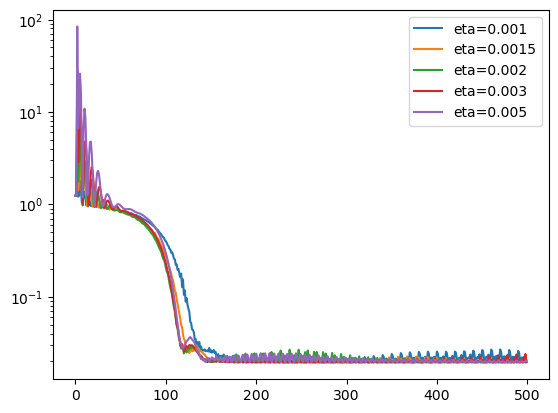

In [34]:
plt.semilogy(df_lr001aw.loss[:500], label='eta=0.001')
plt.semilogy(df_lr0015aw.loss[:500], label='eta=0.0015')
plt.semilogy(df_lr002aw.loss[:500], label='eta=0.002')
plt.semilogy(df_lr003aw.loss[:500], label='eta=0.003')
plt.semilogy(df_lr005aw.loss[:500], label='eta=0.005')

plt.legend()

In [35]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.002_BS=10_whitened.pkl'
df = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.002_BS=200_whitened.pkl'
df_sgd_whitened = load_pandas_df(file_path, fn)

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adagrad_lr=0.002_whitened.pkl'
# df_lr002smw = load_pandas_df(file_path, fn)

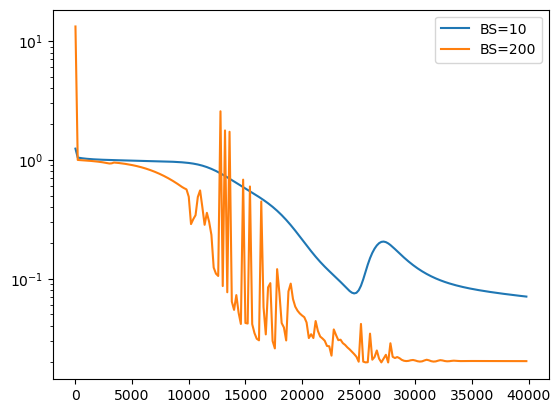

In [36]:
plt.semilogy(df[:40000:200].loss, label='BS=10')
plt.semilogy(df_sgd_whitened[:40000:200].loss, label='BS=200')

plt.legend()

In [37]:
df_trained_whitened_calc_whitened = load_pandas_df(file_path, 'outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_bimodal_gaussian_whitened_SGD_eta=0.001_BS=200_d=50_k=1_n=2000_L=3_m=100_calc_on_whitened.pkl')


df_trained_whitened_calc_whitened_SGD1 = filter_bound_2_3_out(df_trained_whitened_calc_whitened)


df_trained_whitened_calc_whitened_SGD1.insert(0,'optimizer','SGD')

In [38]:
df_con3 = pd.concat([df_trained_whitened_calc_whitened_SGD1, df_trained_whitened_calc_whitened_Adam1])

In [39]:
def plot_cond_num(df, title, filename=None):
    g = sns.relplot(df, x='epoch', y='value', hue='type',kind='line', style='optimizer', markers=True, markevery=10)
        
    g.set_axis_labels('Epochs', r'$\kappa(\widehat{H}_O)$')
    
    g.fig.suptitle(title)
    
    g.fig.subplots_adjust(top=0.9)
    
#     g.set(xscale='log')
    
    if filename:
        g.savefig(filename)

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


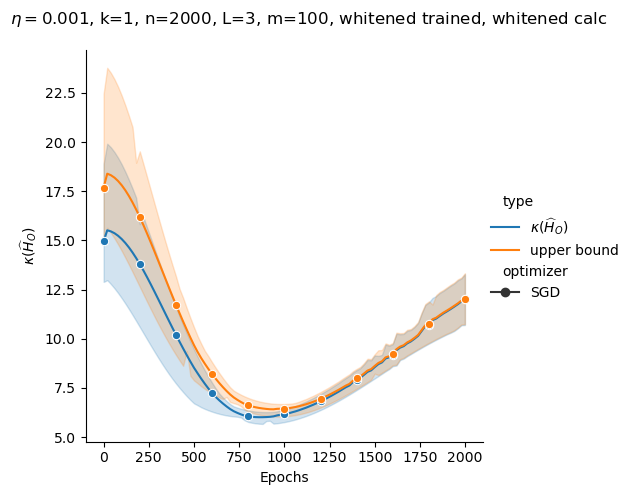

In [40]:
plot_cond_num(df_trained_whitened_calc_whitened_SGD1, '$\eta=0.001$, k=1, n=2000, L=3, m=100, whitened trained, whitened calc',
              'sgd_eta=0.001_k=1_n=2000_L=3_m=100_whitened_train_whitened_calc.pdf'
             )

In [41]:
df_con_w_1 = pd.concat([df_trained_whitened_calc_whitened_SGD1, df_trained_whitened_calc_whitened_Adam1])

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


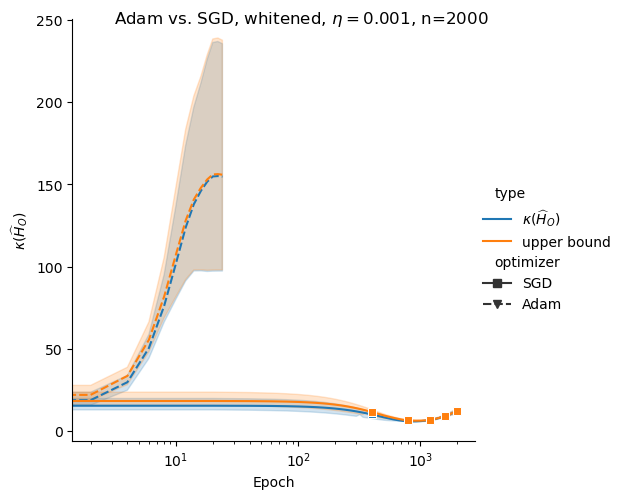

In [42]:
g = sns.relplot(df_con_w_1, x='epoch',y='value', hue='type', style='optimizer', markers=['s','v'], kind='line', markevery=20)

g.set(xscale='log')

g.set_axis_labels('Epoch',r'$\kappa(\widehat{H}_O)$')

g.fig.suptitle('Adam vs. SGD, whitened, $\eta=0.001$, n=2000')

g.savefig('adam_vs_sgd_eta=0.001_whitened.pdf')

In [43]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_whitened_0.pkl'
df_sgd_whitened0_sw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_whitened_1.pkl'
df_sgd_whitened1_sw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_whitened_2.pkl'
df_sgd_whitened2_sw = load_pandas_df(file_path, fn)

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adagrad_lr=0.002_whitened.pkl'
# df_lr002smw = load_pandas_df(file_path, fn)

Text(0.5, 1.0, 'Loss for SGD $\\eta=0.001$ on whitened data for 3 runs')

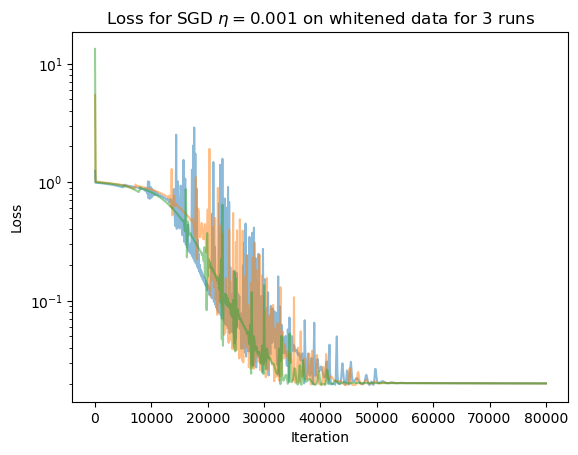

In [44]:
plt.semilogy(df_sgd_whitened0_sw.loss[::100], alpha=0.5)
plt.semilogy(df_sgd_whitened1_sw.loss[::100], alpha=0.5)
plt.semilogy(df_sgd_whitened2_sw.loss[::100], alpha=0.5)

plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.title('Loss for SGD $\eta=0.001$ on whitened data for 3 runs')

Text(0.5, 0, 'Iteration')

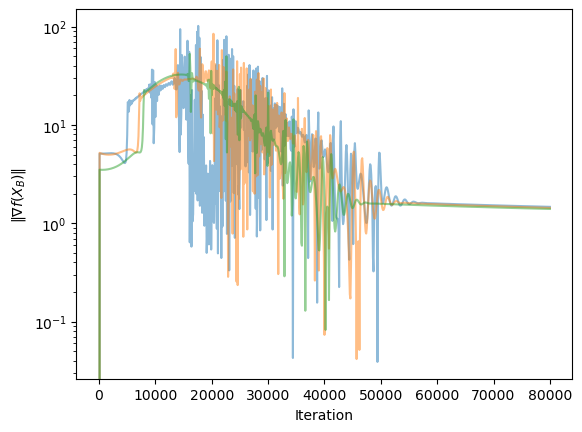

In [45]:
plt.semilogy(df_sgd_whitened0_sw.full_grad_norm[::100], alpha=0.5)
plt.semilogy(df_sgd_whitened1_sw.full_grad_norm[::100], alpha=0.5)
plt.semilogy(df_sgd_whitened2_sw.full_grad_norm[::100], alpha=0.5)

plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

In [46]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_NOTwhitened_0.pkl'
df_sgd_whitened0_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_NOTwhitened_1.pkl'
df_sgd_whitened1_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_SGD_lr=0.001_BS=200_NOTwhitened_2.pkl'
df_sgd_whitened2_sNw = load_pandas_df(file_path, fn)

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adagrad_lr=0.002_whitened.pkl'
# df_lr002smw = load_pandas_df(file_path, fn)

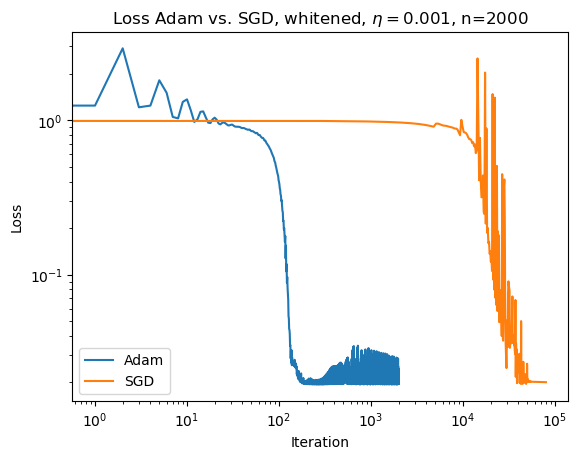

In [47]:
plt.loglog(df_lr001aw.loss[:], label='Adam')
plt.loglog(df_sgd_whitened0_sw[:80000:300].loss, label='SGD')

plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.title('Loss Adam vs. SGD, whitened, $\eta=0.001$, n=2000')

plt.savefig('loss_adam_vs_sgd_whitened_eta=0.001.pdf', bbox_inches='tight')

Text(0.5, 0, 'Iteration')

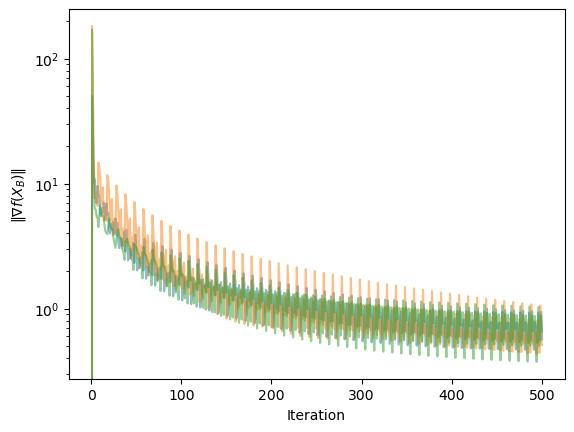

In [48]:
plt.semilogy(df_sgd_whitened0_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(df_sgd_whitened1_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(df_sgd_whitened2_sNw.full_grad_norm[::], alpha=0.5)

plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

Text(0.5, 0, 'Iteration')

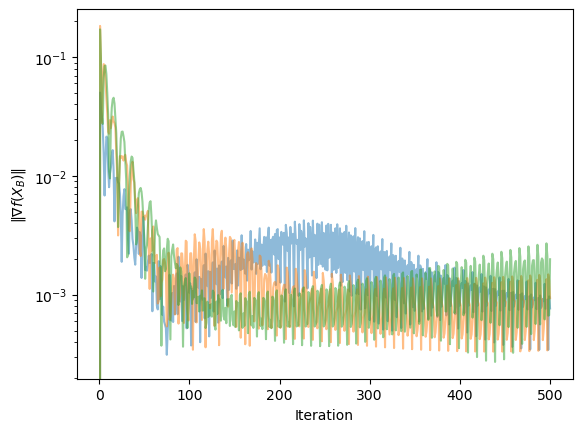

In [49]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.001_BS=200_NOTwhitened_0.pkl'
df_sgd_whitened0_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.001_BS=200_NOTwhitened_1.pkl'
df_sgd_whitened1_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.001_BS=200_NOTwhitened_2.pkl'
df_sgd_whitened2_sNw = load_pandas_df(file_path, fn)

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adagrad_lr=0.002_whitened.pkl'
# df_lr002smw = load_pandas_df(file_path, fn)

plt.semilogy(0.001*df_sgd_whitened0_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(0.001*df_sgd_whitened1_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(0.001*df_sgd_whitened2_sNw.full_grad_norm[::], alpha=0.5)

plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

Text(0.5, 0, 'Iteration')

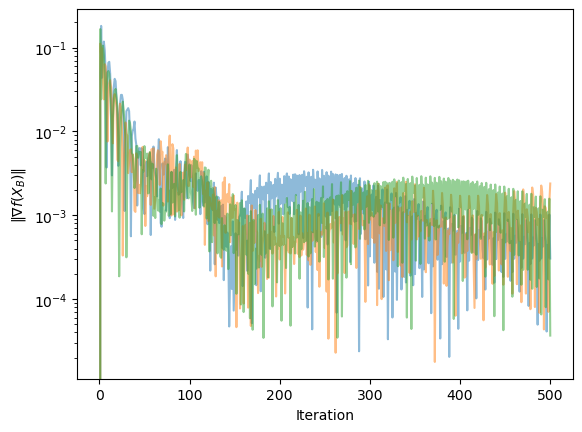

In [50]:
fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.002_BS=200_whitened_0.pkl'
df_sgd_whitened0_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.002_BS=200_whitened_1.pkl'
df_sgd_whitened1_sNw = load_pandas_df(file_path, fn)

fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adam_lr=0.002_BS=200_whitened_2.pkl'
df_sgd_whitened2_sNw = load_pandas_df(file_path, fn)

# fn = 'training_information_effect_of_m_L_on_cond_H_O_more_layers_Adagrad_lr=0.002_whitened.pkl'
# df_lr002smw = load_pandas_df(file_path, fn)

plt.semilogy(0.001*df_sgd_whitened0_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(0.001*df_sgd_whitened1_sNw.full_grad_norm[::], alpha=0.5)
plt.semilogy(0.001*df_sgd_whitened2_sNw.full_grad_norm[::], alpha=0.5)

plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

In [51]:
import torch

# dataset= 'gaussian'
# dataset_path= 'data/bimodal_gaussian/bimodal_gaussian_d=50_k=1_n=2000_whitened.npy'

filename = 'gaussian_SGD_lr=0.001_BS=200_m=100_whitened_network_d=50_m=100_k=1_L=3_linear_SGD_gaussian_0'
filename1 = 'gaussian_SGD_lr=0.001_BS=200_m=100_whitened_network_d=50_m=100_k=1_L=3_linear_SGD_gaussian_1'
filename2 = 'gaussian_SGD_lr=0.001_BS=200_m=100_whitened_network_d=50_m=100_k=1_L=3_linear_SGD_gaussian_2'

train_fn = 'training_information_gaussian_SGD_lr=0.001_BS=200_m=100_whitened_0.pkl'
train_fn1 = 'training_information_gaussian_SGD_lr=0.001_BS=200_m=100_whitened_1.pkl'
train_fn2 = 'training_information_gaussian_SGD_lr=0.001_BS=200_m=100_whitened_2.pkl'


df_sgd_w = load_pandas_df(file_path,train_fn)
df_sgd_w1 = load_pandas_df(file_path,train_fn1)
df_sgd_w2 = load_pandas_df(file_path,train_fn2)

epoch_max = 6000
every_epoch = 20
epochs = np.append(np.arange(0,epoch_max,every_epoch),epoch_max-1)

network_final_fn = 'trained_models/' + filename + '_epoch=%d' %(epoch_max-1) + '.pt'
network_final = torch.load(network_final_fn)
network_final_fn = 'trained_models/' + filename1 + '_epoch=%d' %(epoch_max-1) + '.pt'
network_final1 = torch.load(network_final_fn)
network_final_fn = 'trained_models/' + filename2 + '_epoch=%d' %(epoch_max-1) + '.pt'
network_final2 = torch.load(network_final_fn)


Networks = [] # list of NN with different configurations
Networks1 = [] # list of NN with different configurations
Networks2 = [] # list of NN with different configurations

for epoch in epochs:
    filepath = 'trained_models/' + filename + '_epoch=%d' %epoch + '.pt' 
    filepath1 = 'trained_models/' + filename1 + '_epoch=%d' %epoch + '.pt' 
    filepath2 = 'trained_models/' + filename2 + '_epoch=%d' %epoch + '.pt' 

    network = torch.load(filepath)
    network1 = torch.load(filepath1)
    network2 = torch.load(filepath2)

    Networks.append(network)
    Networks1.append(network1)
    Networks2.append(network2)
    
final_weights = []
for param in network_final.parameters():
    final_weights = np.append(final_weights, torch.flatten(param.detach().cpu()))
    
final_weights1 = []
for param in network_final1.parameters():
    final_weights1 = np.append(final_weights1, torch.flatten(param.detach().cpu()))
    
final_weights2 = []
for param in network_final2.parameters():
    final_weights2 = np.append(final_weights2, torch.flatten(param.detach().cpu()))
    
eps = 1e-19
network_diffs = []
for network in Networks:
    weights = []
    for param in network.parameters():
        weights = np.append(weights, torch.flatten(param.detach().cpu()))
    network_diffs.append(np.linalg.norm(weights - final_weights + eps))

network_diffs1 = []
for network in Networks1:
    weights = []
    for param in network.parameters():
        weights = np.append(weights, torch.flatten(param.detach().cpu()))
    network_diffs1.append(np.linalg.norm(weights - final_weights1 + eps))
    
network_diffs2 = []
for network in Networks2:
    weights = []
    for param in network.parameters():
        weights = np.append(weights, torch.flatten(param.detach().cpu()))
    network_diffs2.append(np.linalg.norm(weights - final_weights2 + eps))
    

cos_angle = []
for ind,network in enumerate(Networks):
    weights_k = []
    if ind == len(Networks)-1:
        break
    for param in Networks[ind].parameters():
        weights_k = np.append(weights_k, torch.flatten(param.detach().cpu()))
    weights_k_plus1 = []
    for param in Networks[ind+1].parameters():
        weights_k_plus1 = np.append(weights_k_plus1, torch.flatten(param.detach().cpu()))
    
    cos_angle.append(np.sum(weights_k * weights_k_plus1)/(np.linalg.norm(weights_k)*np.linalg.norm(weights_k_plus1)))

cos_angle1 = []
for ind,network in enumerate(Networks1):
    weights_k = []
    if ind == len(Networks1)-1:
        break
    for param in Networks1[ind].parameters():
        weights_k = np.append(weights_k, torch.flatten(param.detach().cpu()))
    weights_k_plus1 = []
    for param in Networks1[ind+1].parameters():
        weights_k_plus1 = np.append(weights_k_plus1, torch.flatten(param.detach().cpu()))
    
    cos_angle1.append(np.sum(weights_k * weights_k_plus1)/(np.linalg.norm(weights_k)*np.linalg.norm(weights_k_plus1)))

cos_angle2 = []
for ind,network in enumerate(Networks2):
    weights_k = []
    if ind == len(Networks2)-1:
        break
    for param in Networks2[ind].parameters():
        weights_k = np.append(weights_k, torch.flatten(param.detach().cpu()))
    weights_k_plus1 = []
    for param in Networks2[ind+1].parameters():
        weights_k_plus1 = np.append(weights_k_plus1, torch.flatten(param.detach().cpu()))
    
    cos_angle2.append(np.sum(weights_k * weights_k_plus1)/(np.linalg.norm(weights_k)*np.linalg.norm(weights_k_plus1)))

FileNotFoundError: [Errno 2] No such file or directory: 'trained_models/gaussian_SGD_lr=0.001_BS=200_m=100_whitened_network_d=50_m=100_k=1_L=3_linear_SGD_gaussian_0_epoch=5999.pt'

NameError: name 'network_diffs' is not defined

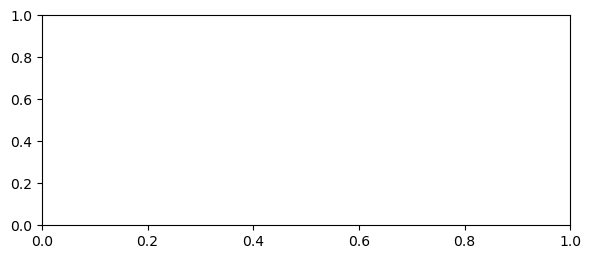

In [52]:
plt.figure(figsize=(15,6))

plt.subplot(221)

plt.plot(np.linspace(0,6000,len(network_diffs)),network_diffs)
plt.plot(np.linspace(0,6000,len(network_diffs)),network_diffs1)
plt.plot(np.linspace(0,6000,len(network_diffs)),network_diffs2)

plt.xlabel('Epochs')
plt.ylabel(r'$||w_k - w_{{end}}||$')

plt.subplot(222)

plt.semilogy(df_sgd_w.loss[::100], alpha=0.5)
plt.semilogy(df_sgd_w1.loss[::100], alpha=0.5)
plt.semilogy(df_sgd_w2.loss[::100], alpha=0.5)

plt.ylabel('loss')
plt.xlabel(r'Iteration')

plt.subplot(223)

plt.semilogy(df_sgd_w.full_grad_norm[::100], alpha=0.5)
plt.semilogy(df_sgd_w1.full_grad_norm[::100], alpha=0.5)
plt.semilogy(df_sgd_w2.full_grad_norm[::100], alpha=0.5)

plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

plt.subplot(224)

plt.semilogy(np.linspace(0,6000,len(cos_angle)),cos_angle)
plt.semilogy(np.linspace(0,6000,len(cos_angle)),cos_angle1)
plt.semilogy(np.linspace(0,6000,len(cos_angle)),cos_angle2)

# plt.ylabel(r'$\|\nabla f(X_{B})\|$')
plt.xlabel(r'Iteration')

plt.title('Training on whitened bimodal Gaussian data')
plt.savefig('bimodal_gaussian_whitened_training.pdf', bbox_inches='tight')

In [53]:
np.linalg.norm(final_weights1-final_weights2)

NameError: name 'final_weights1' is not defined

In [54]:
df = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__NOTwhitened_0.pkl')
df1 = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__NOTwhitened_1.pkl')
df2 = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__NOTwhitened_2.pkl')

df3 = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__whitened_0.pkl')
df4 = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__whitened_1.pkl')
df5 = load_pandas_df(file_path,'training_information_SGD_lr=0.001_BS=50000_m=100_cifar-10__whitened_2.pkl')

# df1 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=50_whitened_1.pkl')
# df2 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=50_whitened_2.pkl')

# df3 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=100_whitened_0.pkl')
# df4 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=100_whitened_1.pkl')
# df5 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=100_whitened_2.pkl')


# df6 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=200_whitened_0.pkl')
# df7 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=200_whitened_1.pkl')
# df8 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=200_whitened_2.pkl')

# df9 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=500_whitened_0.pkl')
# df10 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=500_whitened_1.pkl')
# df11 = load_pandas_df(file_path,'training_information_fashion_SGD_lr=0.001_BS=2000_m=500_whitened_2.pkl')


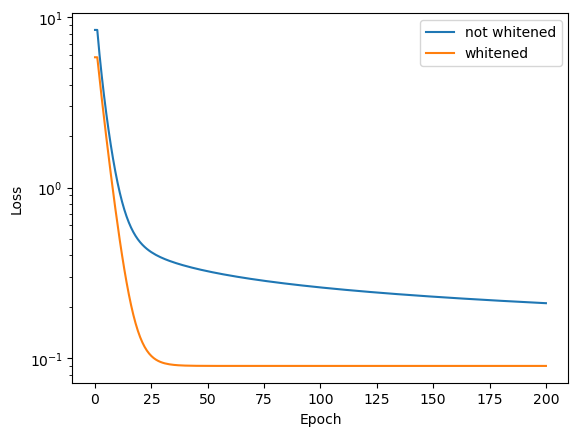

In [55]:
plt.semilogy(np.mean([df.loss,df2.loss,df3.loss],axis=0), label='not whitened')
plt.semilogy(np.mean([df3.loss,df4.loss,df5.loss],axis=0), label='whitened')
# plt.semilogy(np.mean([df6.loss,df7.loss,df8.loss],axis=0), label='m=200, whitened')
# plt.semilogy(np.mean([df9.loss,df10.loss,df11.loss],axis=0), label='m=500, whitened')
# plt.semilogy(df.loss, label='whitened')
# plt.semilogy(df1.loss, label='not whitened')


plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.savefig('Loss_during_training_MNIST_SGD_whitened_vs_NOTwhitened.pdf', bbox_inches='tight')

In [56]:
df = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_whitened_0.pkl')
df1 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_whitened_1.pkl')
df2 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_whitened_2.pkl')

df3 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_whitened_0.pkl')
df4 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_whitened_1.pkl')
df5 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_whitened_2.pkl')


df6 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_whitened_0.pkl')
df7 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_whitened_1.pkl')
df8 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_whitened_2.pkl')

df9 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_whitened_0.pkl')
df10 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_whitened_1.pkl')
df11 = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_whitened_2.pkl')


NameError: name 'df3_nw' is not defined

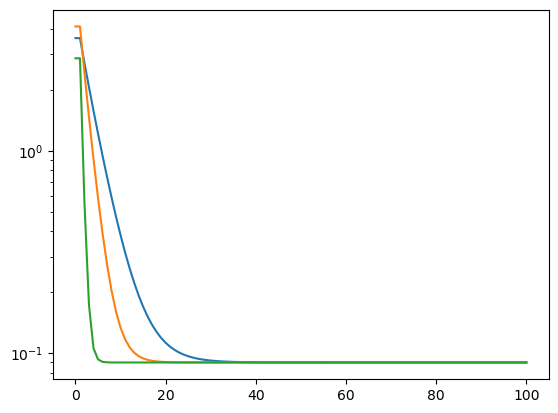

In [57]:
# plt.semilogy(np.mean([df.loss,df1.loss,df2.loss],axis=0), label='m=50, whitened')
plt.semilogy(np.mean([df3.loss,df4.loss,df5.loss],axis=0), label='m=100, whitened')
plt.semilogy(np.mean([df6.loss,df7.loss,df8.loss],axis=0), label='m=200, whitened')
plt.semilogy(np.mean([df9.loss,df10.loss,df11.loss],axis=0), label='m=500, whitened')
plt.semilogy(np.mean([df3_nw.loss,df4_nw.loss,df5_nw.loss],axis=0), label='m=100, not whitened')
plt.semilogy(np.mean([df6_nw.loss,df7_nw.loss,df8_nw.loss],axis=0), label='m=200, not whitened')
plt.semilogy(np.mean([df9_nw.loss,df10_nw.loss,df11_nw.loss],axis=0), label='m=500, not whitened')



plt.legend()

In [58]:
# df_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_NOTwhitened_0.pkl')
# df1_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_NOTwhitened_1.pkl')
# df2_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=50_NOTwhitened_2.pkl')

df3_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_NOTwhitened_0.pkl')
df4_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_NOTwhitened_1.pkl')
df5_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=100_NOTwhitened_2.pkl')


df6_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_NOTwhitened_0.pkl')
df7_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_NOTwhitened_1.pkl')
df8_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=200_NOTwhitened_2.pkl')

df9_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_NOTwhitened_0.pkl')
df10_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_NOTwhitened_1.pkl')
df11_nw = load_pandas_df(file_path,'training_information_mnist_SGD_lr=0.001_BS=50000_m=500_NOTwhitened_2.pkl')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


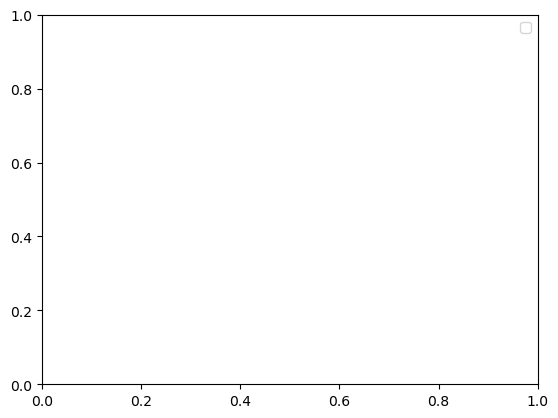

In [59]:
# plt.semilogy(np.mean([df_nw.loss,df1_nw.loss,df2_nw.loss],axis=0), label='m=50, not whitened')
# plt.semilogy(np.mean([df6_nw.loss,df7_nw.loss,df8_nw.loss],axis=0), label='m=200, not whitened')
# plt.semilogy(np.mean([df9_nw.loss,df10_nw.loss,df11_nw.loss],axis=0), label='m=500, not whitened')


plt.legend()

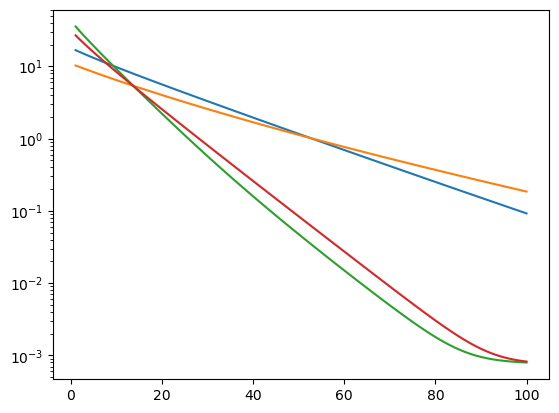

In [60]:
plt.semilogy(df.full_grad_norm[1::])
plt.semilogy(df2.full_grad_norm[1::])
plt.semilogy(df3.full_grad_norm[1::])
plt.semilogy(df4.full_grad_norm[1::])

In [61]:
df

,width,depth,activ_f,epoch,loss,grad_norm_squared,full_grad_norm
0,50.0,3.0,linear,0.0,2.547925,0.000000,0.000000
1,50.0,3.0,linear,0.0,2.547925,279.838593,16.728377
2,50.0,3.0,linear,1.0,2.276806,246.170639,15.689827
3,50.0,3.0,linear,2.0,2.038158,217.094223,14.734118
4,50.0,3.0,linear,3.0,1.827582,191.875717,13.851920
...,...,...,...,...,...,...,...
96,50.0,3.0,linear,95.0,0.090102,0.012685,0.112629
97,50.0,3.0,linear,96.0,0.090090,0.011481,0.107151
98,50.0,3.0,linear,97.0,0.090079,0.010392,0.101942
99,50.0,3.0,linear,98.0,0.090068,0.009407,0.096991


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


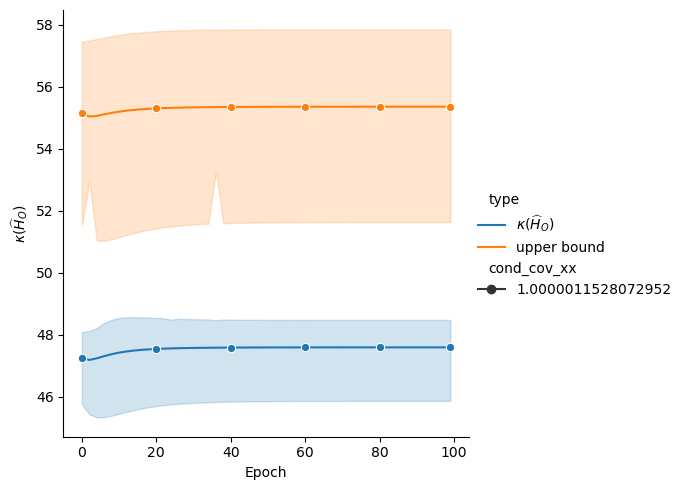

In [62]:
filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_MNIST_whitened_SGD_eta=0.001_BS=50000_d=784_k=10_n=50000_L=3_m=100.pkl'
df = load_pandas_df(file_path,filename)

df = filter_bound_2_3_out(df)

sns.relplot(df,x='epoch',y='value', hue='type', markers=True, style='cond_cov_xx', markevery=10, kind='line')

plt.xlabel('Epoch')
plt.ylabel(r'$\kappa(\widehat{H}_O)$')

plt.savefig('Condnum_MNIST_whitened_SGD.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(39.96989594846938, 0.5, '$\\kappa(\\widehat{H}_O)$')

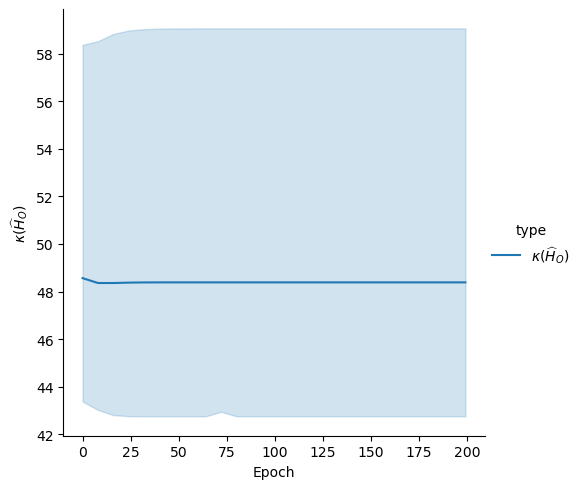

In [63]:
filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_Cifar10_whitened_SGD_eta=0.001_BS=50000_d=3072_k=10_n=50000_L=3_m=100.pkl'
df = load_pandas_df(file_path,filename)

df_nw = filter_bound_2_3_out(df)
df_nw = filter_bound_1_out(df_nw)

g = sns.relplot(df_nw,x='epoch',y='value', hue='type', markers=True, kind='line')
# g.set(yscale='log')

plt.xlabel('Epoch')
plt.ylabel(r'$\kappa(\widehat{H}_O)$')

# plt.savefig('Condnum_Cifar10_NOTwhitened_SGD_onlyCondnum.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(40.74363469091627, 0.5, '$\\kappa(\\widehat{H}_O)$')

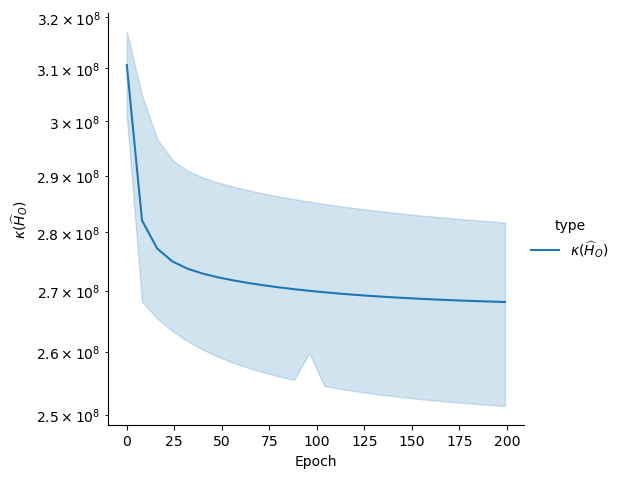

In [64]:
filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_Cifar10_NOTwhitened_SGD_eta=0.001_BS=50000_d=3072_k=10_n=50000_L=3_m=100.pkl'
df = load_pandas_df(file_path,filename)

df_w = filter_bound_2_3_out(df)
df_w = filter_bound_1_out(df_w)

g = sns.relplot(df_w,x='epoch',y='value', hue='type', markers=True, kind='line')
g.set(yscale='log')

plt.xlabel('Epoch')
plt.ylabel(r'$\kappa(\widehat{H}_O)$')

# plt.savefig('Condnum_Cifar10_NOTwhitened_SGD_onlyCondnum.pdf', bbox_inches='tight')

In [65]:
filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_MNIST_whitened_SGD_eta=0.001_BS=50000_d=784_k=10_n=50000_m=100.pkl'
df0 = load_pandas_df(file_path,filename)

filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_MNIST_whitened_SGD_eta=0.001_BS=50000_d=784_k=10_n=50000_m=200_300.pkl'
df = load_pandas_df(file_path,filename)

filename='outer_prod_hessian_information_trained_experiments_LinearNet_trained_on_MNIST_whitened_SGD_eta=0.001_BS=50000_d=784_k=10_n=50000_m=500.pkl'
df1 = load_pandas_df(file_path,filename)



df = pd.concat([df0,df,df1])

df_w = filter_bound_2_3_out(df)
# df_w = filter_bound_1_out(df_w)
df_w

,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,mnist,FCNN,1.000001,784,10,100,1,linear,0.0,$\kappa(\widehat{H}_O)$,6.171755
1,mnist,FCNN,1.000001,784,10,100,1,linear,0.0,upper bound,6.171758
3,mnist,FCNN,1.000001,784,10,100,1,linear,8.0,$\kappa(\widehat{H}_O)$,6.161638
4,mnist,FCNN,1.000001,784,10,100,1,linear,8.0,upper bound,6.161642
6,mnist,FCNN,1.000001,784,10,100,1,linear,16.0,$\kappa(\widehat{H}_O)$,6.166893
...,...,...,...,...,...,...,...,...,...,...,...
694,mnist,FCNN,1.000001,784,10,500,3,linear,184.0,upper bound,32.106960
696,mnist,FCNN,1.000001,784,10,500,3,linear,192.0,$\kappa(\widehat{H}_O)$,28.006699
697,mnist,FCNN,1.000001,784,10,500,3,linear,192.0,upper bound,32.106945
699,mnist,FCNN,1.000001,784,10,500,3,linear,199.0,$\kappa(\widehat{H}_O)$,28.006685


/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(38.50575694444445, 0.5, '$\\kappa(\\widehat{H}_O)$')

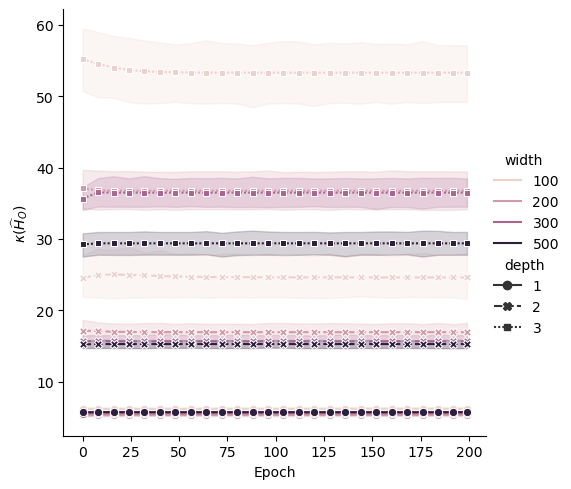

In [66]:
g = sns.relplot(df_w,x='epoch',y='value', hue='width', style='depth', markers=True, kind='line')
# g.set(yscale='log')

plt.xlabel('Epoch')
plt.ylabel(r'$\kappa(\widehat{H}_O)$')

# plt.savefig('Condnum_Cifar10_NOTwhitened_SGD_onlyCondnum.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(36.30377083333334, 0.5, '$\\kappa(\\widehat{H}_O)$')

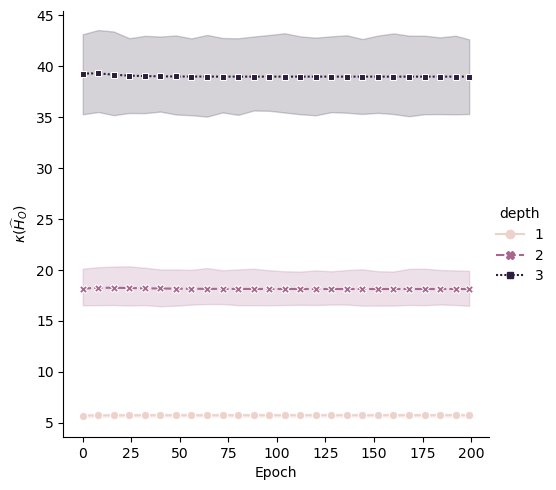

In [67]:
g = sns.relplot(df_w,x='epoch',y='value', hue='depth', style='depth', markers=True, kind='line')
# g.set(yscale='log')

plt.xlabel('Epoch')
plt.ylabel(r'$\kappa(\widehat{H}_O)$')

# plt.savefig('Condnum_Cifar10_NOTwhitened_SGD_onlyCondnum.pdf', bbox_inches='tight')

In [68]:
filename='training_information_residual_beta=1_SGD_lr=0.001_BS=500_MNIST_n=50000_mnist__whitened_0.pkl'
df = load_pandas_df(file_path,filename)
df
# df_w = filter_bound_2_3_out(df)
# # df_w = filter_bound_1_out(df_w)
# df_w

,width,depth,activ_f,epoch,loss,grad_norm_squared,full_grad_norm
0,100.0,3.0,linear,0.0,0.100032,0.000000,0.000000
1,100.0,3.0,linear,0.0,0.100032,0.000001,0.001092
2,100.0,3.0,linear,1.0,0.100032,0.000001,0.001092
3,100.0,3.0,linear,2.0,0.100032,0.000001,0.001092
4,100.0,3.0,linear,3.0,0.100032,0.000001,0.001092
...,...,...,...,...,...,...,...
46,500.0,3.0,linear,45.0,0.100012,0.000003,0.001692
47,500.0,3.0,linear,46.0,0.100012,0.000003,0.001692
48,500.0,3.0,linear,47.0,0.100012,0.000003,0.001692
49,500.0,3.0,linear,48.0,0.100012,0.000003,0.001692


<Axes: xlabel='epoch', ylabel='loss'>

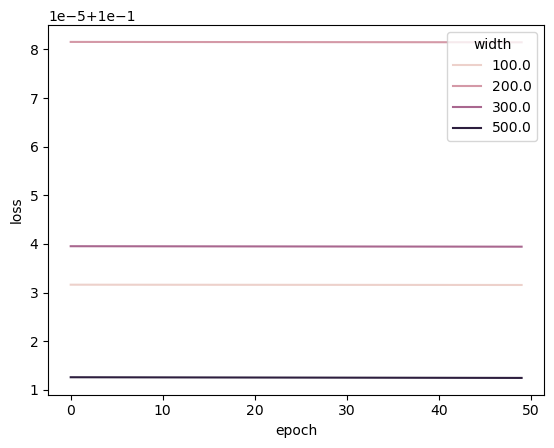

In [69]:
sns.lineplot(df,x='epoch', y='loss', hue='width')

In [70]:
df0 = load_pandas_df(file_path,'training_information_leaky_relu_SGD_lr=0.001_BS=500_MNIST_n=500_mnist__whitened_0.pkl')
# df1 = load_pandas_df(file_path,'training_information_leaky_relu_SGD_lr=0.001_BS=500_MNIST_n=1000_notwhit_mnist__NOTwhitened_1.pkl')
# df2 = load_pandas_df(file_path,'training_information_leaky_relu_SGD_lr=0.001_BS=500_MNIST_n=1000_notwhit_mnist__NOTwhitened_2.pkl')

# df = pd.concat([df0,df1,df2])

In [71]:
df0

,width,depth,activ_f,epoch,loss,grad_norm_squared,full_grad_norm
0,100.0,1.0,leaky_relu,0.0,1.131032,0.000000,0.000000
1,100.0,1.0,leaky_relu,0.0,1.131032,23.599431,4.857925
2,100.0,1.0,leaky_relu,0.0,1.107582,23.014351,4.797327
3,100.0,1.0,leaky_relu,1.0,1.084688,22.546281,4.748292
4,100.0,1.0,leaky_relu,1.0,1.062285,21.984946,4.688811
...,...,...,...,...,...,...,...
296,3000.0,1.0,leaky_relu,147.0,0.092001,0.069155,0.262974
297,3000.0,1.0,leaky_relu,148.0,0.092001,0.069154,0.262971
298,3000.0,1.0,leaky_relu,148.0,0.092000,0.069155,0.262973
299,3000.0,1.0,leaky_relu,149.0,0.092000,0.069153,0.262970


[None]

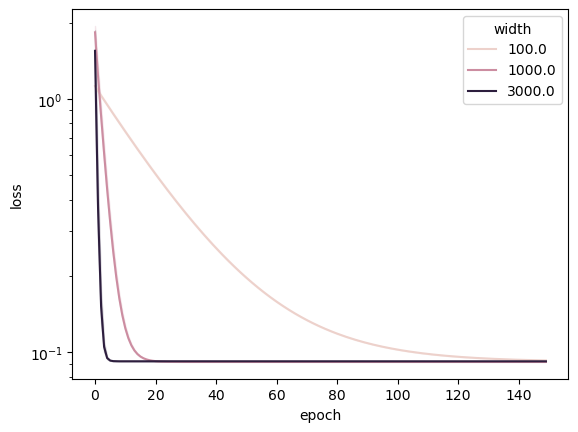

In [72]:
g = sns.lineplot(df0, x='epoch', y='loss', hue='width')

g.set(yscale='log')

[None]

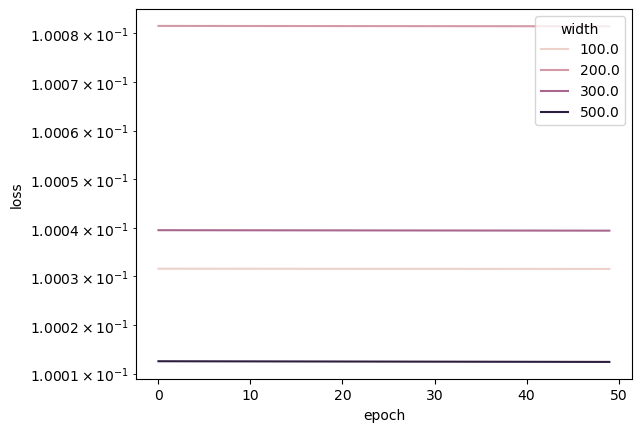

In [73]:
g = sns.lineplot(df, x='epoch', y='loss', hue='width')

g.set(yscale='log')

[None]

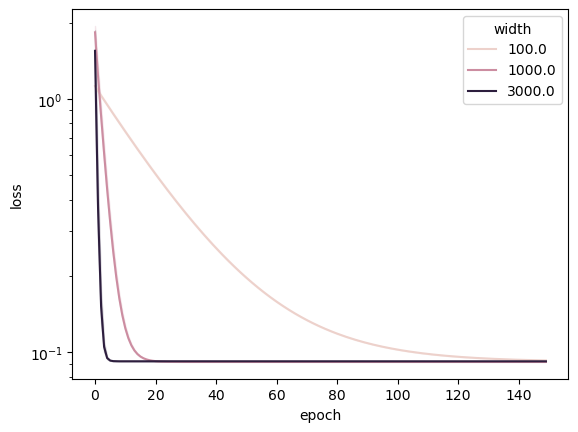

In [74]:
g = sns.lineplot(df0, x='epoch', y='loss', hue='width')

g.set(yscale='log')

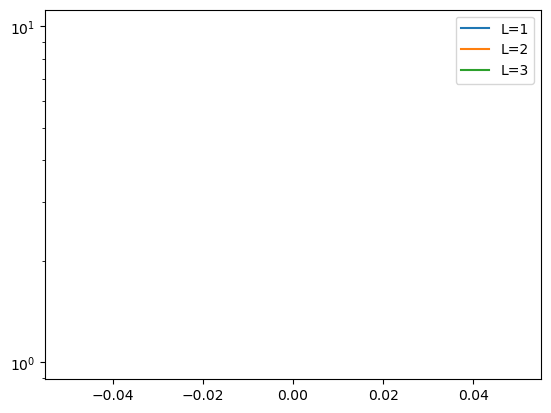

In [75]:
df_100 = df0[df0['width']==200]
# plt.plot(df_100.loss)
plt.plot(df_100[df_100['depth']==1].full_grad_norm, label='L=1')
plt.plot(df_100[df_100['depth']==2].full_grad_norm, label='L=2')
plt.plot(df_100[df_100['depth']==3].full_grad_norm, label='L=3')
plt.yscale('log')
plt.legend()

In [76]:
df_100[df_100['depth']==1].loss

Series([], Name: loss, dtype: float64)

In [77]:
filename='outer_prod_hessian_information_trained_experiments_TEST_trained_on_MNIST_whitened_linear_SGD_eta=0.001_BS=5000_d=784_k=10_m=1000_L=1_n=5000.pkl'
df0 = load_pandas_df(file_path,filename)

df_w = filter_bound_2_3_out(df0)
# df_w = filter_bound_1_out(df_w)
df_w

,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,mnist,FCNN,1.000005,784,10,1000,5,linear,0.0,$\kappa(\widehat{H}_O)$,inf
1,mnist,FCNN,1.000005,784,10,1000,5,linear,0.0,upper bound,85.154823
3,mnist,FCNN,1.000005,784,10,1000,5,linear,8.0,$\kappa(\widehat{H}_O)$,inf
4,mnist,FCNN,1.000005,784,10,1000,5,linear,8.0,upper bound,424.320465
6,mnist,FCNN,1.000005,784,10,1000,5,linear,16.0,$\kappa(\widehat{H}_O)$,inf
7,mnist,FCNN,1.000005,784,10,1000,5,linear,16.0,upper bound,424.494232
9,mnist,FCNN,1.000005,784,10,1000,5,linear,24.0,$\kappa(\widehat{H}_O)$,inf
10,mnist,FCNN,1.000005,784,10,1000,5,linear,24.0,upper bound,424.500977
12,mnist,FCNN,1.000005,784,10,1000,5,linear,32.0,$\kappa(\widehat{H}_O)$,inf
13,mnist,FCNN,1.000005,784,10,1000,5,linear,32.0,upper bound,424.509552


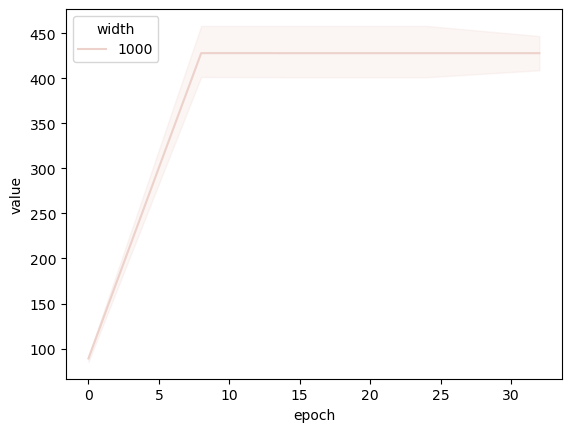

In [78]:
g = sns.lineplot(df_w, x='epoch', y='value', hue='width')

# g.set(yscale='log')

In [79]:
filename='training_information_TEST_linear_Adam_lr=0.001_BS=50000_MNIST_mnist__whitened_0.pkl'

df = load_pandas_df(file_path,filename)

In [80]:
df

,width,depth,activ_f,epoch,loss,grad_norm_squared,full_grad_norm
0,100.0,1.0,linear,0.0,1.987532,0.000000,0.000000
1,100.0,1.0,linear,0.0,1.987532,80.621513,8.978948
2,100.0,1.0,linear,1.0,0.936237,35.801033,5.983396
3,100.0,1.0,linear,2.0,0.570515,20.320211,4.507794
4,100.0,1.0,linear,3.0,0.408303,13.513283,3.676042
...,...,...,...,...,...,...,...
56,100.0,1.0,linear,55.0,0.070351,0.117435,0.342688
57,100.0,1.0,linear,56.0,0.068965,0.077409,0.278224
58,100.0,1.0,linear,57.0,0.067749,0.044046,0.209871
59,100.0,1.0,linear,58.0,0.066917,0.025520,0.159749


[None]

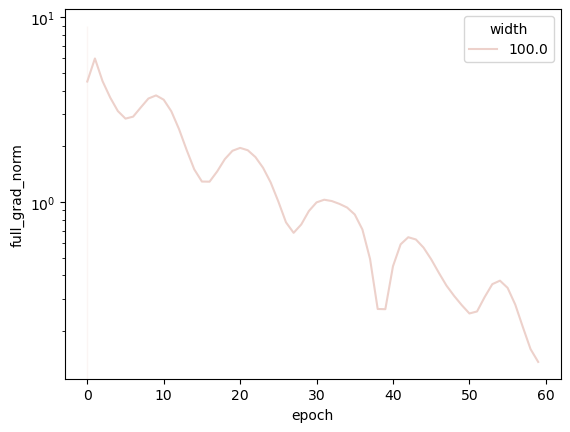

In [81]:
g = sns.lineplot(df,x='epoch', y='full_grad_norm', hue='width')

g.set(yscale='log')

In [82]:
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_leakyrelu_SGD_eta=0.1_BS=500_m=100_L=1_n=500.pkl'
df0 = load_pandas_df(file_path,filename)

df_w = filter_bound_2_3_out(df0)
# df_w = filter_bound_1_out(df_w)
df_w

,dataset,network,cond_cov_xx,input_dim,output_dim,width,depth,activ_f,epoch,type,value
0,mnist,FCNN,1.000005,784,10,100,1,leaky_relu,0.0,$\kappa(\widehat{H}_O)$,1.232587e+02
1,mnist,FCNN,1.000005,784,10,100,1,leaky_relu,0.0,upper bound,2.363076e+05
4,mnist,FCNN,1.000005,784,10,100,1,leaky_relu,8.0,$\kappa(\widehat{H}_O)$,1.176769e+02
5,mnist,FCNN,1.000005,784,10,100,1,leaky_relu,8.0,upper bound,2.410123e+05
8,mnist,FCNN,1.000005,784,10,100,1,leaky_relu,16.0,$\kappa(\widehat{H}_O)$,1.177014e+02
...,...,...,...,...,...,...,...,...,...,...,...
277,mnist,FCNN,1.000005,784,10,500,1,leaky_relu,40.0,upper bound,1.533763e+06
280,mnist,FCNN,1.000005,784,10,500,1,leaky_relu,48.0,$\kappa(\widehat{H}_O)$,2.491905e+02
281,mnist,FCNN,1.000005,784,10,500,1,leaky_relu,48.0,upper bound,1.525000e+06
284,mnist,FCNN,1.000005,784,10,500,1,leaky_relu,49.0,$\kappa(\widehat{H}_O)$,2.490260e+02


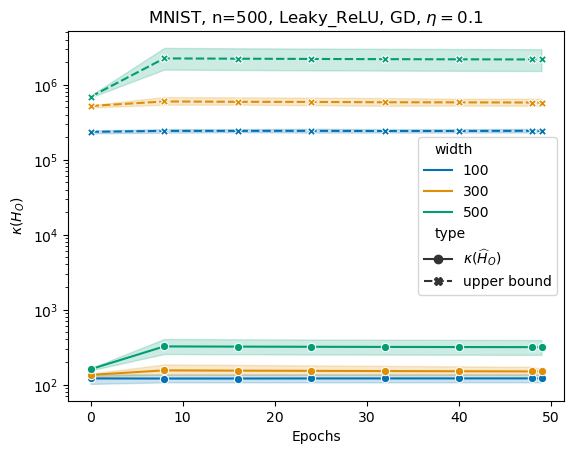

In [83]:
g = sns.lineplot(df_w, x='epoch', y='value', hue='width', style='type', markers=True, palette='colorblind')

g.set(yscale='log')

g.set_ylabel(r'$\kappa(H_O)$')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.1$')

plt.savefig('MNIST_whitened_leakyrelu_SGD_eta=0.1_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

In [84]:
filename = 'training_information_leakyrelu_SGD_lr=0.1_BS=500_MNIST_mnist__whitened_0.pkl'
df0 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.1_BS=500_MNIST_mnist__whitened_1.pkl'
df1 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.1_BS=500_MNIST_mnist__whitened_2.pkl'
df2 = load_pandas_df(file_path, filename)
df_lr1 = pd.concat([df0,df1,df2])

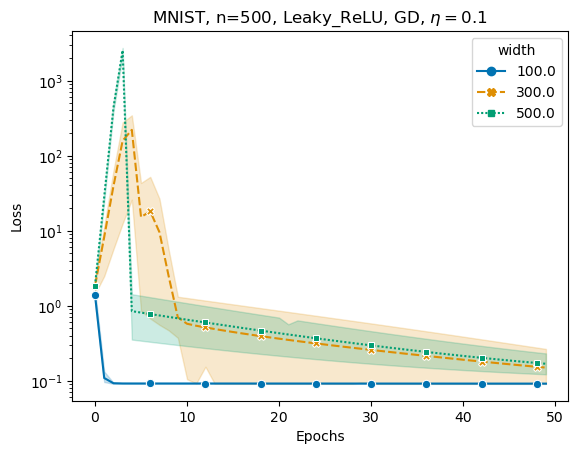

In [85]:
import seaborn as sns

g = sns.lineplot(df_lr1, x='epoch', y='loss', hue='width', style='width', markers=True, markevery=6, palette='colorblind')
g.set(yscale= 'log')

g.set_ylabel(r'Loss')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.1$')

plt.savefig('Loss_MNIST_whitened_leakyrelu_SGD_eta=0.1_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

# sns.lineplot(df_lr01[ df_lr05['width']==300], x='epoch', y='loss')


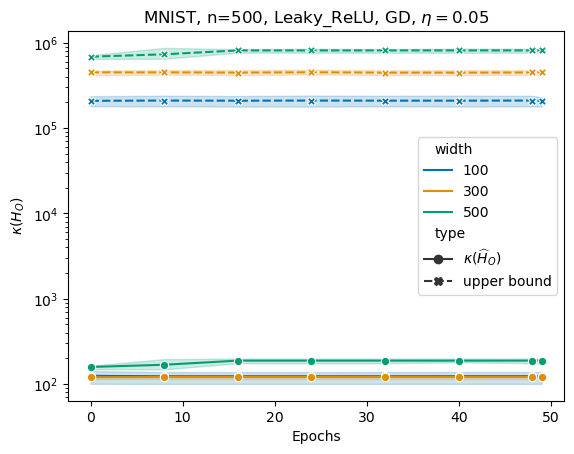

In [86]:
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_leakyrelu_SGD_eta=0.05_BS=500_m=100_L=1_n=500.pkl'
df0 = load_pandas_df(file_path,filename)

df_w = filter_bound_2_3_out(df0)
# df_w = filter_bound_1_out(df_w)
df_w
g = sns.lineplot(df_w, x='epoch', y='value', hue='width', style='type', markers=True, palette='colorblind')

g.set(yscale='log')

g.set_ylabel(r'$\kappa(H_O)$')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.05$')

plt.savefig('MNIST_whitened_leakyrelu_SGD_eta=0.05_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')


In [87]:
filename = 'training_information_leakyrelu_SGD_lr=0.05_BS=500_MNIST_mnist__whitened_0.pkl'
df0 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.05_BS=500_MNIST_mnist__whitened_1.pkl'
df1 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.05_BS=500_MNIST_mnist__whitened_2.pkl'
df2 = load_pandas_df(file_path, filename)
df_lr05 = pd.concat([df0,df1,df2])

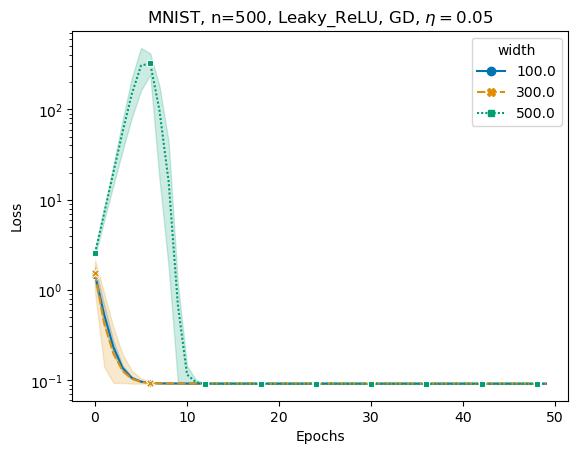

In [88]:
g = sns.lineplot(df_lr05, x='epoch', y='loss', hue='width', style='width', markers=True, markevery=6, palette='colorblind')
g.set(yscale= 'log')


g.set_ylabel(r'Loss')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.05$')

plt.savefig('Loss_MNIST_whitened_leakyrelu_SGD_eta=0.05_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

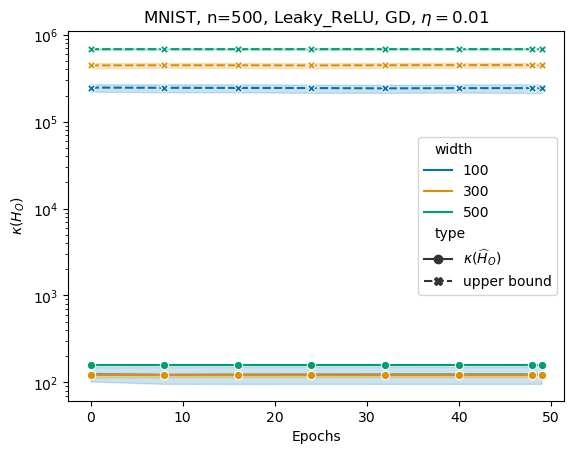

In [89]:
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_leakyrelu_SGD_eta=0.01_BS=500_m=100_L=1_n=500.pkl'
df0 = load_pandas_df(file_path,filename)

df_w = filter_bound_2_3_out(df0)
# df_w = filter_bound_1_out(df_w)
df_w
g = sns.lineplot(df_w, x='epoch', y='value', hue='width', style='type', markers=True, palette='colorblind')

g.set(yscale='log')

g.set_ylabel(r'$\kappa(H_O)$')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.01$')

plt.savefig('MNIST_whitened_leakyrelu_SGD_eta=0.01_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

In [90]:
filename = 'training_information_leakyrelu_SGD_lr=0.01_BS=500_MNIST_mnist__whitened_0.pkl'
df0 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.01_BS=500_MNIST_mnist__whitened_1.pkl'
df1 = load_pandas_df(file_path, filename)
filename = 'training_information_leakyrelu_SGD_lr=0.01_BS=500_MNIST_mnist__whitened_2.pkl'
df2 = load_pandas_df(file_path, filename)
df_lr01 = pd.concat([df0,df1,df2])

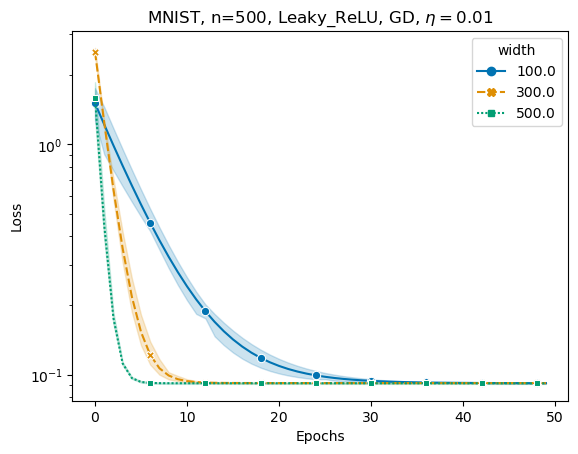

In [91]:
g = sns.lineplot(df_lr01, x='epoch', y='loss', hue='width', style='width', markers=True, markevery=6, palette='colorblind')
g.set(yscale= 'log')


g.set_ylabel(r'Loss')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Leaky_ReLU, GD, $\eta=0.01$')

plt.savefig('Loss_MNIST_whitened_leakyrelu_SGD_eta=0.01_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

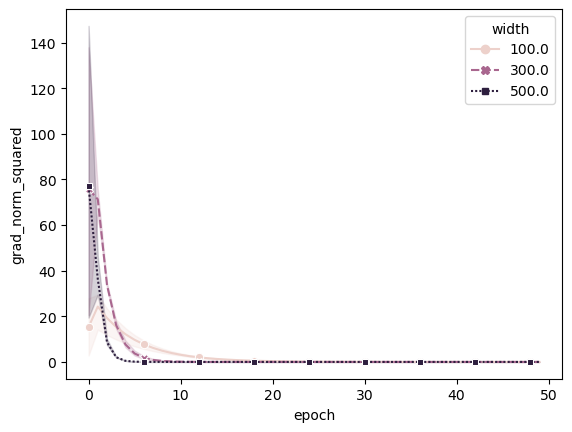

In [92]:
g = sns.lineplot(df_lr01, x='epoch', y='grad_norm_squared', hue='width', style='width', markers=True, markevery=6)


In [358]:
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_linear_SGD_eta=0.001_BS=5000_n=5000_m=100.pkl'
df0 = load_pandas_df(file_path,filename)
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_linear_SGD_eta=0.001_BS=5000_n=5000_m=300.pkl'
df1 = load_pandas_df(file_path,filename)
filename='outer_prod_hessian_information_trained_experiments_MNIST_whitened_linear_SGD_eta=0.001_BS=5000_n=5000_m=500.pkl'
df2 = load_pandas_df(file_path,filename)

Text(0.5, 1.0, 'MNIST, n=500, Linear, GD, $\\eta=0.001$')

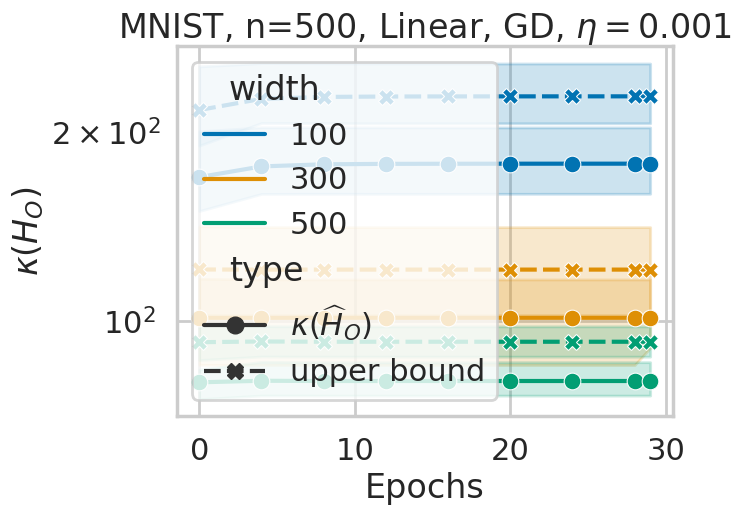

In [359]:
df = pd.concat([df0,df1,df2])

df_w = filter_bound_2_3_out(df)
# df_w = filter_bound_1_out(df_w)
df_w
g = sns.lineplot(df_w[df_w['depth']==5], x='epoch', y='value', hue='width', style='type', markers=True, palette='colorblind')

g.set(yscale='log')

g.set_ylabel(r'$\kappa(H_O)$')
g.set_xlabel(r'Epochs')
g.set_title(r'MNIST, n=500, Linear, GD, $\eta=0.001$')

# plt.savefig('MNIST_whitened_leakyrelu_SGD_eta=0.01_BS=500_m=100_L=1_n=500.pdf', bbox_inches='tight')

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


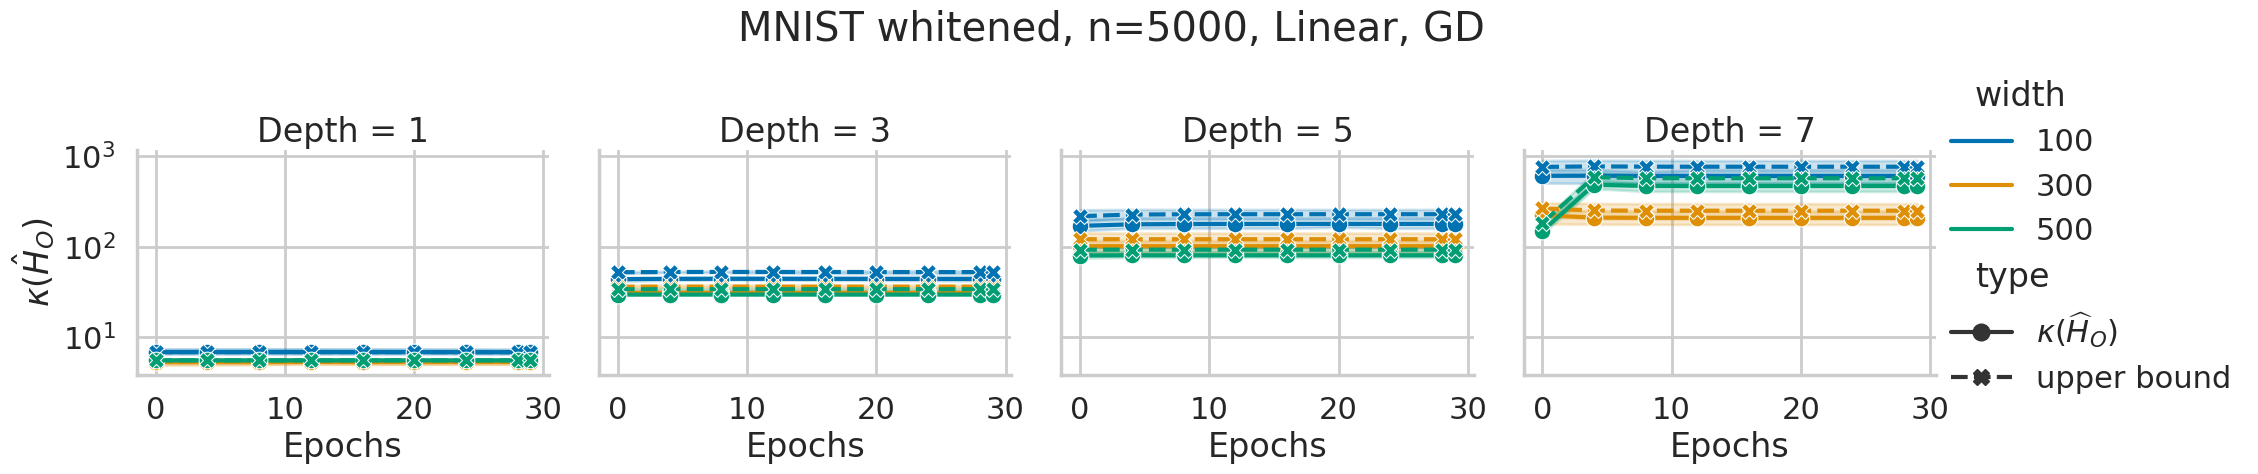

In [383]:
g = sns.relplot(df_w, x='epoch', y='value', hue='width', col='depth', style='type', markers=True, palette='colorblind', kind='line', ax=axs[0])

g.set(yscale='log')

g.set_axis_labels(r'Epochs', r'$\kappa(\hat{H}_O)$')
# g.set_xlabel(r'Epochs')
# g.set_sup_title(r'MNIST, n=5000, Linear, GD, $\eta=0.001$')
g.set_titles(r'Depth = {col_name}')
g.fig.suptitle(r'MNIST whitened, n=5000, Linear, GD')
g.fig.subplots_adjust(top=0.7)

g.savefig('condnum_MNIST_whitened_training_eta=0.001.jpg')

In [384]:
filename='training_information_linear_SGD_lr=0.001_BS=5000_MNIST_mnist__whitened_0.pkl'
df0 = load_pandas_df(file_path,filename)
filename='training_information_linear_SGD_lr=0.001_BS=5000_MNIST_mnist__whitened_1.pkl'
df1 = load_pandas_df(file_path,filename)
filename='training_information_linear_SGD_lr=0.001_BS=5000_MNIST_mnist__whitened_2.pkl'
df2 = load_pandas_df(file_path,filename)

df = pd.concat([df0,df1,df2])

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


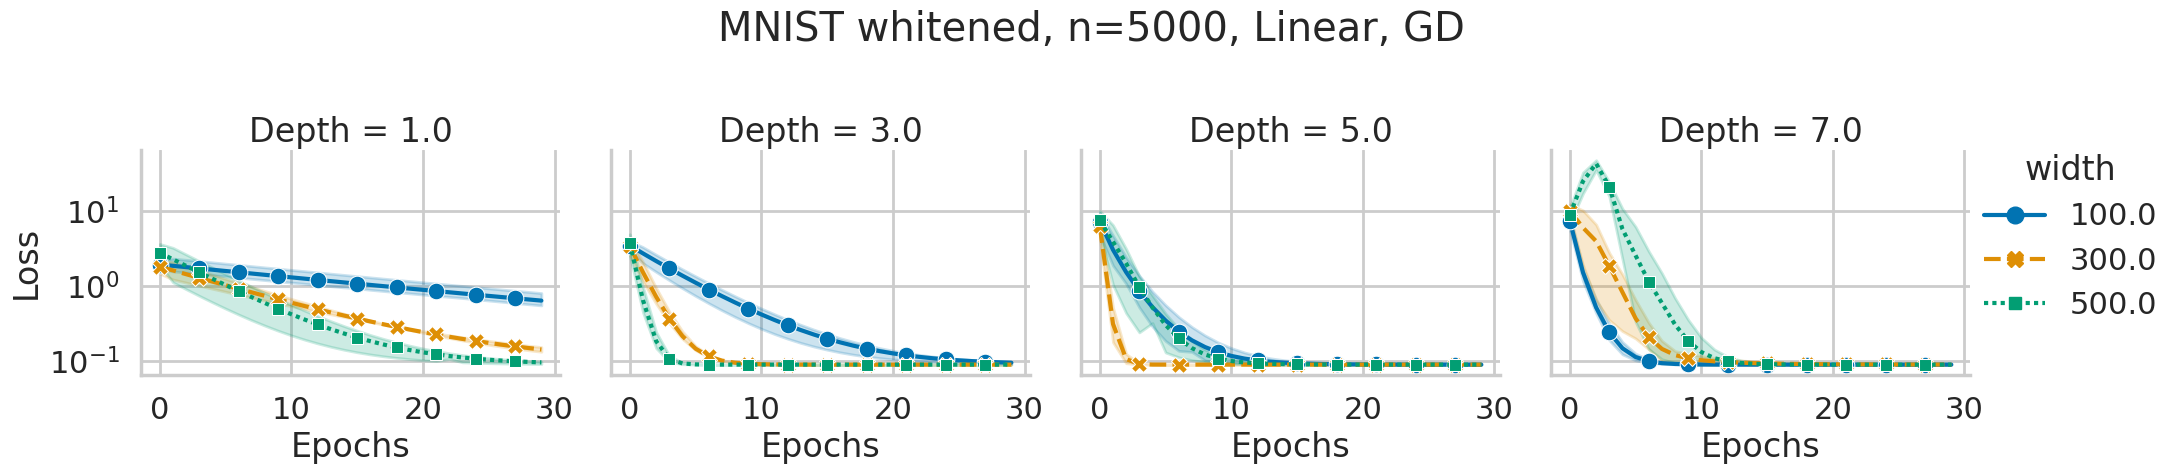

In [385]:
g = sns.relplot(df, x='epoch', y='loss', hue='width', col='depth', style='width', markers=True, markevery=3, palette='colorblind', kind='line')
g.set(yscale='log')

g.set_axis_labels(r'Epochs', r'Loss')
# g.set_xlabel(r'Epochs')
# g.set_sup_title(r'MNIST, n=5000, Linear, GD, $\eta=0.001$')
g.set_titles(r'Depth = {col_name}')
g.fig.suptitle(r'MNIST whitened, n=5000, Linear, GD')
g.fig.subplots_adjust(top=0.7)

g.savefig('loss_MNIST_whitened_training_eta=0.001.jpg')

In [98]:
filename='training_information_linear_GD_lr=0.01_n=500_MNIST_downsample_fac=4_mnist__whitened_0.pkl'
df0 = load_pandas_df(file_path,filename)
filename='training_information_linear_GD_lr=0.01_n=500_MNIST_downsample_fac=4_mnist__whitened_1.pkl'
df1 = load_pandas_df(file_path,filename)
filename='training_information_linear_GD_lr=0.01_n=500_MNIST_downsample_fac=4_mnist__whitened_2.pkl'
df2 = load_pandas_df(file_path,filename)

df = pd.concat([df0,df1,df2])

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


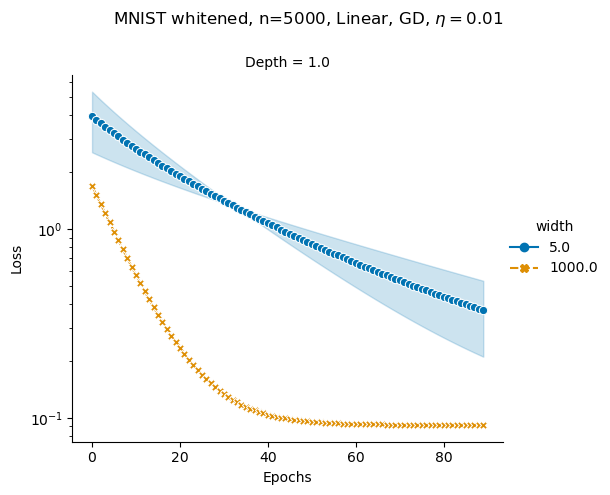

In [99]:
g = sns.relplot(df, x='epoch', y='loss', hue='width', col='depth', style='width', markers=True, palette='colorblind', kind='line')
g.set(yscale='log')

g.set_axis_labels(r'Epochs', r'Loss')
# g.set_xlabel(r'Epochs')
# g.set_sup_title(r'MNIST, n=5000, Linear, GD, $\eta=0.001$')
g.set_titles(r'Depth = {col_name}')
g.fig.suptitle(r'MNIST whitened, n=5000, Linear, GD, $\eta=0.01$')
g.fig.subplots_adjust(top=0.85)



In [426]:
from matplotlib import pyplot as plt

In [705]:
filename = 'full_hessian_information_trained_experiments_FashionMNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=15_L=1.pkl'
filename1 = 'outer_prod_hessian_information_trained_experiments_FashionMNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=15_L=1.pkl'

In [706]:
df = load_pandas_df(file_path,filename)
df

,input_dim,output_dim,width,depth,activ_f,epoch,H_cond,H_o_cond,lam_abs_min_H,lam_abs_max_H,lam_abs_min_H_o,lam_abs_max_H_o,mean_diff_H_H_o,max_diff_H_H_o,std_diff_H_H_o,H_rank,H_o_rank
0,49.0,10.0,10.0,2.0,linear,0.0,3.627148e+06,1.571039e+06,2.745271e-09,0.009958,1.372636e-08,0.021565,1.804468e-07,0.001660,0.000124,690.0,490.0
1,49.0,10.0,10.0,2.0,linear,200.0,5.318512e+07,1.012029e+07,2.783353e-10,0.014803,7.384820e-09,0.074737,5.888863e-07,0.005432,0.000406,690.0,490.0
2,49.0,10.0,10.0,2.0,linear,400.0,1.026326e+08,2.056700e+07,1.679292e-10,0.017235,4.185684e-09,0.086087,8.622478e-07,0.005831,0.000595,690.0,490.0
3,49.0,10.0,10.0,2.0,linear,600.0,4.480680e+07,6.509599e+06,3.903383e-10,0.017490,1.343110e-08,0.087431,9.655201e-07,0.007048,0.000666,689.0,490.0
4,49.0,10.0,10.0,2.0,linear,800.0,4.977250e+07,2.868411e+06,3.519787e-10,0.017519,3.053464e-08,0.087586,9.911493e-07,0.007102,0.000684,689.0,490.0
5,49.0,10.0,10.0,2.0,linear,1000.0,1.126016e+08,1.536982e+06,1.556806e-10,0.017530,5.702220e-08,0.087642,9.957230e-07,0.007047,0.000687,687.0,490.0
6,49.0,10.0,10.0,2.0,linear,1200.0,9.905938e+07,8.270061e+05,1.771260e-10,0.017546,1.060714e-07,0.087722,1.000217e-06,0.006882,0.000690,684.0,490.0
7,49.0,10.0,10.0,2.0,linear,1400.0,1.204249e+08,4.593135e+05,1.460755e-10,0.017591,1.914792e-07,0.087949,1.018253e-06,0.006611,0.000702,685.0,490.0
8,49.0,10.0,10.0,2.0,linear,1600.0,1.207698e+08,2.489879e+05,1.459565e-10,0.017627,3.539727e-07,0.088135,1.036961e-06,0.006747,0.000715,681.0,490.0
9,49.0,10.0,10.0,2.0,linear,1800.0,1.193639e+08,1.224883e+05,1.476990e-10,0.017630,7.196560e-07,0.088149,1.038921e-06,0.006766,0.000717,674.0,490.0


In [707]:
df = df[df['epoch'] < 800]

In [708]:
df1 = load_pandas_df(file_path,filename1)
df1 = df1[df1['epoch'] < 800] 

# df1 = df1[df1['type']=='H_o_cond']
df1_k = df1[df1['type']=='H_o_cond']
# df1_k

df1 = filter_bound_2_3_out(df1)
# df1
df1_bound = df1[df1['type']=='upper bound']
df1_k = df1[df1['type']=='H_o_cond']

In [709]:
df_training = load_pandas_df(file_path,'training_information_linear_GD_lr=3_n=500_FashionMNIST_downsample_fac=4_fashion__whitened_0_d=49_m=15_L=1.pkl')



In [710]:
# plt.semilogy(df1_k.epoch, df1_bound.value, label='$upper bound$',alpha=0.7)

# plt.semilogy(df.epoch,df.H_o_cond, label='$\kappa({H_O})$',alpha=0.7)

ValueError: x and y must have same first dimension, but have shapes (0,) and (4,)

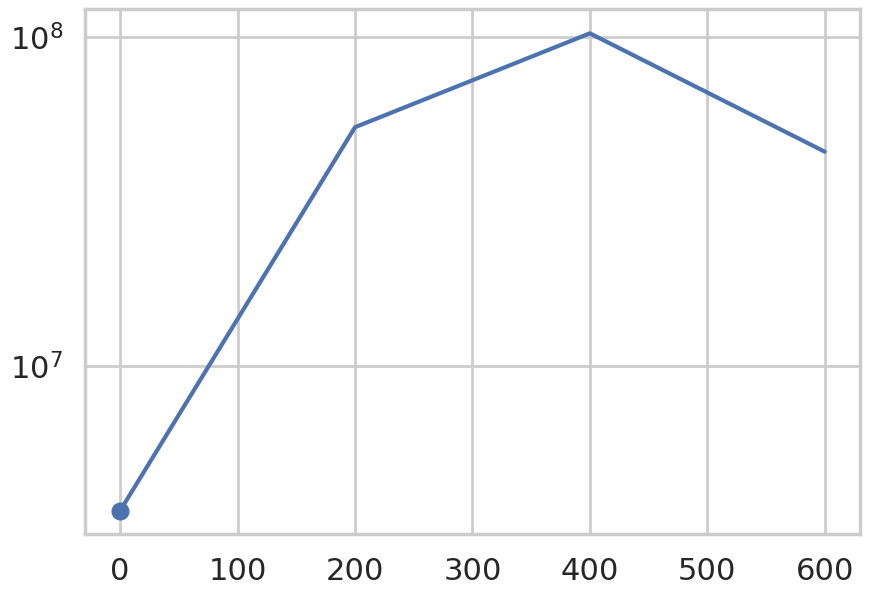

In [711]:
f = plt.figure(figsize=(10,15))

plt.subplot(211)
plt.semilogy(df.epoch,df.H_cond, label=r'$\kappa(H_L)$',marker='o', markevery=7)
plt.semilogy(df1_k.epoch, df1_bound.value, label='upper bound',marker='s', markevery=7,alpha=0.7)

plt.semilogy(df.epoch,df.H_o_cond, label='$\kappa({H_O})$',alpha=0.7, marker='v', markevery=9)
# plt.semilogy(df1_k.epoch, df1_k.value, label='H_o_cond_expl')

plt.legend(loc=(1,0))
plt.xlabel('Epoch')
plt.ylabel('$\kappa(H)$')
plt.title('Downsampled MNIST whitened, m=15, L=1', fontsize=16)

plt.subplots_adjust(bottom=0.1, right=0.8, top=1)

plt.subplot(212)

plt.semilogy(df_training.loss[1:600])
plt.xlabel('Epoch')
plt.ylabel(r'$\| \nabla_\theta F_\theta(x)\|$')
plt.title('Gradient norm during training', fontsize=16)
# plt.savefig('MNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=15_L=1.jpg', bbox_inches='tight')

In [727]:
filename = 'full_hessian_information_trained_experiments_FashionMNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=10_L=2_early_phase.pkl'
filename1 = 'outer_prod_hessian_information_trained_experiments_FashionMNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=10_L=2_early_phase.pkl'

df = load_pandas_df(file_path,filename)
df1 = load_pandas_df(file_path,filename1)

df1_bound = df1[df1['type']=='upper bound']

df1 = filter_bound_2_3_out(df1)


df1_k = df1[df1['type']=='H_o_cond']

In [728]:
df

,input_dim,output_dim,width,depth,activ_f,epoch,H_cond,H_o_cond,lam_abs_min_H,lam_abs_max_H,lam_abs_min_H_o,lam_abs_max_H_o,mean_diff_H_H_o,max_diff_H_H_o,std_diff_H_H_o,H_rank,H_o_rank
0,49.0,10.0,10.0,2.0,linear,0.0,10008.590287,104623.088020,9.370539e-07,0.009379,2.643155e-07,0.027654,1.929346e-07,0.001546,0.000133,651.0,490.0
1,49.0,10.0,10.0,2.0,linear,400.0,78412.042175,485407.951073,2.364231e-07,0.018538,1.908926e-07,0.092661,9.079740e-07,0.008536,0.000626,647.0,490.0
2,49.0,10.0,10.0,2.0,linear,800.0,94913.227164,400827.733340,2.008980e-07,0.019068,2.378421e-07,0.095334,1.010566e-06,0.007690,0.000697,625.0,490.0
3,49.0,10.0,10.0,2.0,linear,1200.0,94136.347188,255204.189530,2.033530e-07,0.019143,3.750481e-07,0.095714,1.043009e-06,0.008056,0.000720,587.0,490.0
4,49.0,10.0,10.0,2.0,linear,1600.0,92988.423633,125552.873949,2.060105e-07,0.019157,7.628880e-07,0.095783,1.051887e-06,0.008081,0.000726,542.0,490.0
5,49.0,10.0,10.0,2.0,linear,2000.0,98887.120900,59517.286666,1.937736e-07,0.019162,1.609757e-06,0.095808,1.054761e-06,0.008068,0.000728,562.0,490.0
6,49.0,10.0,10.0,2.0,linear,2000.0,98887.120900,59517.286666,1.937736e-07,0.019162,1.609757e-06,0.095808,1.054761e-06,0.008068,0.000728,562.0,490.0


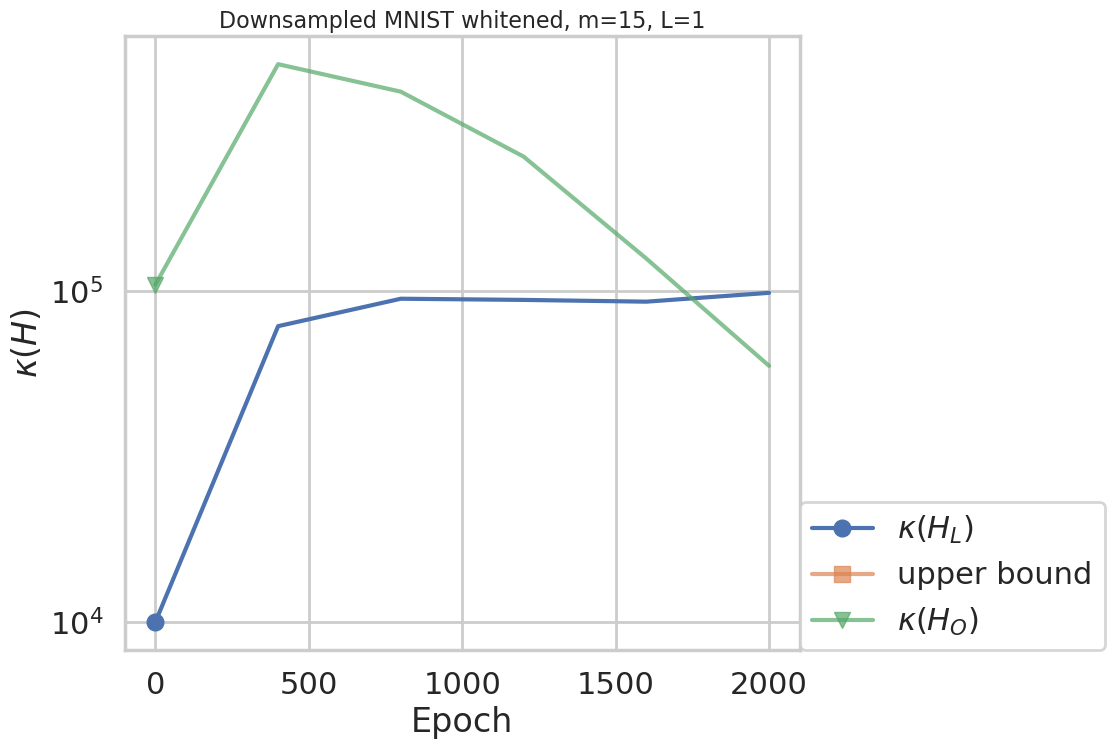

In [729]:
f = plt.figure(figsize=(10,15))

plt.subplot(211)
plt.semilogy(df.epoch,df.H_cond, label=r'$\kappa(H_L)$',marker='o', markevery=7)
plt.semilogy(df1_k.epoch, df1_bound.value, label='upper bound',marker='s', markevery=7,alpha=0.7)

plt.semilogy(df.epoch,df.H_o_cond, label='$\kappa({H_O})$',alpha=0.7, marker='v', markevery=9)
# plt.semilogy(df1_k.epoch, df1_k.value, label='H_o_cond_expl')

plt.legend(loc=(1,0))
plt.xlabel('Epoch')
plt.ylabel('$\kappa(H)$')
plt.title('Downsampled MNIST whitened, m=15, L=1', fontsize=16)

plt.subplots_adjust(bottom=0.1, right=0.8, top=1)

# plt.subplot(212)

# plt.semilogy(df_training.loss[1:600])
# plt.xlabel('Epoch')
# plt.ylabel(r'$\| \nabla_\theta F_\theta(x)\|$')
# plt.title('Gradient norm during training', fontsize=16)
# plt.savefig('MNIST_whitened_downsample_fac=4_linear_GD_eta=3_n=500_m=15_L=1.jpg', bbox_inches='tight')

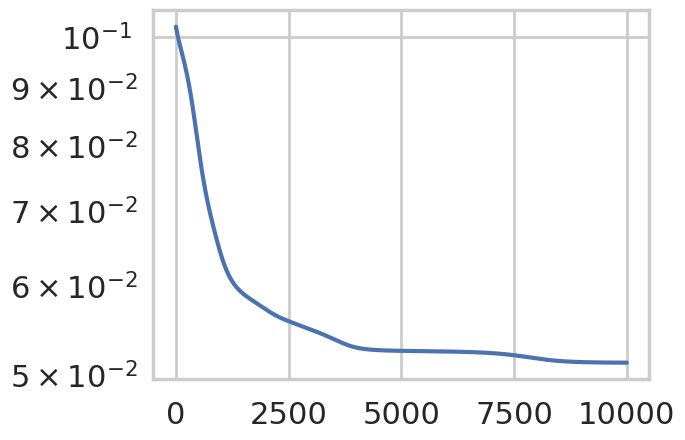

In [704]:
df_training = load_pandas_df(file_path,'training_information_linear_GD_lr=1_n=500_FashionMNIST_downsample_fac=4_detailed_fashion__whitened_0_d=49_m=10_L=2.pkl')

plt.semilogy(df_training.loss[:])

In [11]:
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)

sns.set_theme()



# sns.set(font_scale=1, rc={'text.usetex': True, 'text.latex.preamble': r"\usepackage{bm} \usepackage{amsmath}"})
# sns.set(rc={'text.usetex': True, 'text.latex.preamble': latex_preamble})

sns.set_style('whitegrid')
# plt.rcParams.update({
#     'text.usetex': True,
#     'font.family': 'serif',
# })

sns.set_context("poster")



In [353]:
df = load_pandas_df(file_path, 'outer_prod_hessian_information_initialization_experiments_linear_CNN.pkl')

In [354]:
df

,dataset,network,cond_cov_xx,input_dim,kernel_size,num_filters,depth,activ_f,epoch,type,value
0,mnist,sequential_cnn,1378.853871,36.0,7.0,2.0,1.0,linear,0.0,H_o_cond,1.479981e+05
1,mnist,sequential_cnn,1378.853871,36.0,7.0,2.0,1.0,linear,0.0,H_o_cond_bound1,1.895371e+05
2,mnist,sequential_cnn,1378.853871,36.0,7.0,2.0,1.0,linear,0.0,H_o_cond,6.011176e+05
3,mnist,sequential_cnn,1378.853871,36.0,7.0,2.0,1.0,linear,0.0,H_o_cond_bound1,1.188826e+06
4,mnist,sequential_cnn,1378.853871,36.0,7.0,2.0,1.0,linear,0.0,H_o_cond,4.665367e+04
...,...,...,...,...,...,...,...,...,...,...,...
115,mnist,sequential_cnn,1378.853871,36.0,11.0,5.0,1.0,linear,0.0,H_o_cond_bound1,3.201442e+05
116,mnist,sequential_cnn,1378.853871,36.0,11.0,5.0,1.0,linear,0.0,H_o_cond,2.439544e+05
117,mnist,sequential_cnn,1378.853871,36.0,11.0,5.0,1.0,linear,0.0,H_o_cond_bound1,6.577487e+05
118,mnist,sequential_cnn,1378.853871,36.0,11.0,5.0,1.0,linear,0.0,H_o_cond,1.516480e+05


In [355]:
df = df.astype({'kernel_size': int, 'num_filters':int})
df.replace({'H_o_cond_bound1': 'upper bound', 'H_o_cond': r'$\kappa(\widehat{H}_O)$'}, inplace=True)

/users/staff/dmi-dmi/zhao0005/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


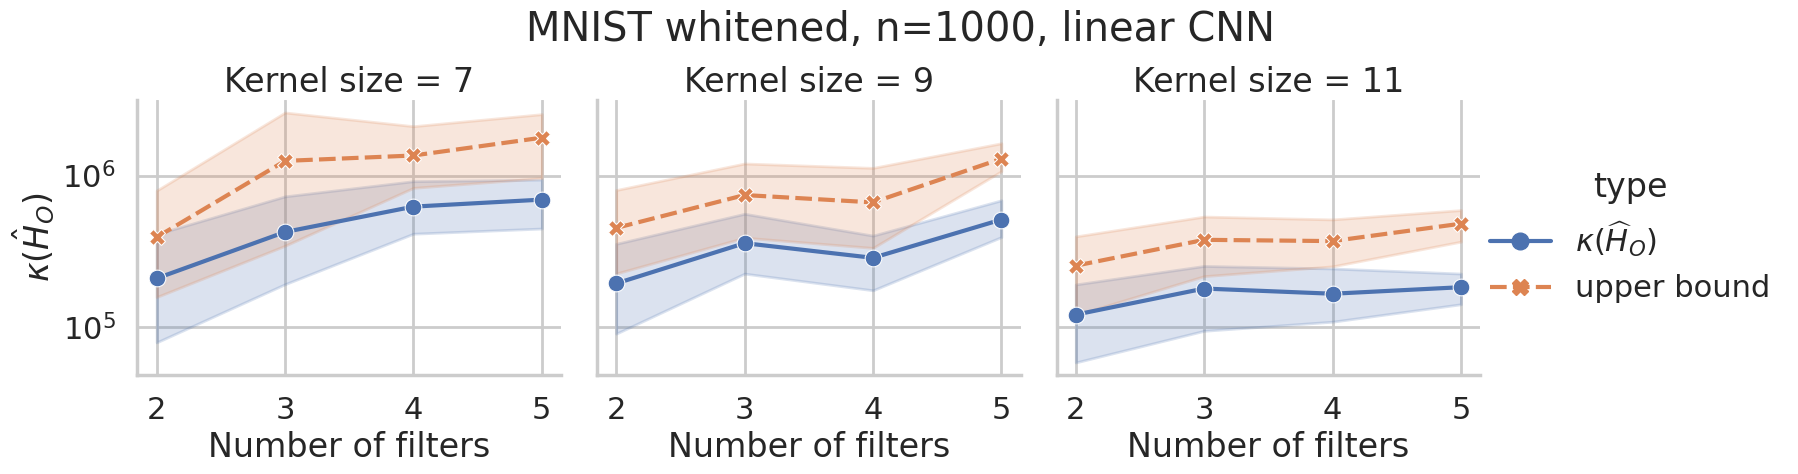

In [356]:
# f = plt.figure(figsize=(15,10))
g = sns.relplot(df, x='num_filters',y='value',hue='type', col='kernel_size', kind='line', style='type', markers=True)
g.set(yscale='log')

# g.set_xlabel(r'Epochs')
# g.set_sup_title(r'MNIST, n=5000, Linear, GD, $\eta=0.001$')

g.fig.suptitle(r'MNIST whitened, n=1000, linear CNN')
g.fig.subplots_adjust(top=0.8)

g.set_axis_labels('Number of filters', r'$\kappa(\hat{H}_O)$')
g.set_titles(r'Kernel size = {col_name}')

g.savefig('linear_CNN_condition_number.jpg')